# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `9` | `Questions`

> Hi Team, 👋

> Having reviewed your submissions so far, some of the questions below have been crafted specifically to enhance your grasp of the course material.

> I trust that the exercises below will support your review and understanding of the course content. 🤞

#### <font color = "green"> Please submit your answers via the eLearn submission folder. Again, you may submit incomplete answers. (Answer as fully as you can. This will help me to see where you stand.)

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import datetime as dt
import yfinance as yf

import seaborn as sns

from pandas_datareader import data as pdr

import plotly.graph_objects as go
from plotly.subplots import make_subplots

from pandas.plotting import scatter_matrix

# assumption checks for Time-Series
from statsmodels.graphics.tsaplots import plot_acf

from sklearn import metrics

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

from sklearn.decomposition import TruncatedSVD

from numpy.linalg import inv, eig, svd

from sklearn.manifold import TSNE  # Used for FX

from scipy.cluster.hierarchy import dendrogram, linkage, ward

import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm

from scipy.linalg import svd   
from scipy import stats
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

In [2]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from mpl_toolkits.mplot3d import Axes3D

import re
from collections import OrderedDict
from time import time
import sqlite3   

In [3]:
# Loading Algorithm

from sklearn.linear_model import LinearRegression

# Regularization
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# ENSEMBLE

## Bagging (BOOTSTRAPPED AGGREGATION)
from sklearn.ensemble import RandomForestRegressor    # Imputation of missing values
from sklearn.ensemble import ExtraTreesRegressor

## Boosting
from sklearn.ensemble import AdaBoostRegressor           # Adaptive Boosting
from sklearn.ensemble import GradientBoostingRegressor   # XGB -> eXtreme Gradient Boosting -> dummification (ENCODING)

# Support Vector Machine
from sklearn.svm import SVR

# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor      # In econometrics, for matching and propensity scoring method

# Multi-layer Perceptron (Neural Networks)
from sklearn.neural_network import MLPRegressor

import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm

In [4]:
# For data analysis and model evaluation

# for data split
from sklearn.model_selection import train_test_split

# Step 4: Hyperparameter Tuning
# for cross-validation (k-fold cross validation)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# for assessment
from sklearn.metrics import mean_squared_error

# for Feature Selection
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import SelectKBest

In [5]:
import warnings
warnings.filterwarnings("ignore")

> Let's set some print option.

In [6]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

## 👇 <font color = "purple"> Bigger Question 1. 
    
### The first question is to look for clusters of correlations using the agglomerate hierarchical clustering technique (AGNES).
    
### <font color = green> Using the 102 tickers below, and what you have learned in class, run the analysis and develop a dendrogram. Make sure to employ the inclusion criterion of less than 30% of missing values.
    
    According to the dendrogram, which of the stocks are most correlated? 
    
    Also based on the dendrogram, please identify two stocks that are not well correlated.

In [7]:
nasdaq100_components = pd.read_html("https://en.wikipedia.org/wiki/Nasdaq-100")[4]

nasdaq100_components

,Company,Symbol,GICS Sector,GICS Sub-Industry
0,Adobe Inc.,ADBE,Information Technology,Application Software
1,Advanced Micro Devices,AMD,Information Technology,Semiconductors
2,Airbnb,ABNB,Consumer Discretionary,"Hotels, Resorts & Cruise Lines"
3,Alphabet Inc. (Class A),GOOGL,Communication Services,Interactive Media & Services
4,Alphabet Inc. (Class C),GOOG,Communication Services,Interactive Media & Services
...,...,...,...,...
96,Vertex Pharmaceuticals,VRTX,Health Care,Biotechnology
97,Warner Bros. Discovery,WBD,Communication Services,Broadcasting
98,"Workday, Inc.",WDAY,Information Technology,Application Software
99,Xcel Energy,XEL,Utilities,Multi-Utilities


### Below are the lines of code that lead to an answer:

In [8]:
nasdaq_tickers = list(nasdaq100_components["Symbol"])

In [9]:
nasdaq_tickers

['ADBE',
 'AMD',
 'ABNB',
 'GOOGL',
 'GOOG',
 'AMZN',
 'AEP',
 'AMGN',
 'ADI',
 'ANSS',
 'AAPL',
 'AMAT',
 'ARM',
 'ASML',
 'AZN',
 'TEAM',
 'ADSK',
 'ADP',
 'BKR',
 'BIIB',
 'BKNG',
 'AVGO',
 'CDNS',
 'CDW',
 'CHTR',
 'CTAS',
 'CSCO',
 'CCEP',
 'CTSH',
 'CMCSA',
 'CEG',
 'CPRT',
 'CSGP',
 'COST',
 'CRWD',
 'CSX',
 'DDOG',
 'DXCM',
 'FANG',
 'DLTR',
 'DASH',
 'EA',
 'EXC',
 'FAST',
 'FTNT',
 'GEHC',
 'GILD',
 'GFS',
 'HON',
 'IDXX',
 'ILMN',
 'INTC',
 'INTU',
 'ISRG',
 'KDP',
 'KLAC',
 'KHC',
 'LRCX',
 'LIN',
 'LULU',
 'MAR',
 'MRVL',
 'MELI',
 'META',
 'MCHP',
 'MU',
 'MSFT',
 'MRNA',
 'MDLZ',
 'MDB',
 'MNST',
 'NFLX',
 'NVDA',
 'NXPI',
 'ORLY',
 'ODFL',
 'ON',
 'PCAR',
 'PANW',
 'PAYX',
 'PYPL',
 'PDD',
 'PEP',
 'QCOM',
 'REGN',
 'ROP',
 'ROST',
 'SBUX',
 'SMCI',
 'SNPS',
 'TTWO',
 'TMUS',
 'TSLA',
 'TXN',
 'TTD',
 'VRSK',
 'VRTX',
 'WBD',
 'WDAY',
 'XEL',
 'ZS']

In [10]:
nasdaq_info = yf.download(nasdaq_tickers)

[*********************100%%**********************]  101 of 101 completed


In [11]:
nasdaq_prices = nasdaq_info["Adj Close"]

In [12]:
nasdaq_prices

Ticker,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,AMGN,...,TSLA,TTD,TTWO,TXN,VRSK,VRTX,WBD,WDAY,XEL,ZS
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,0.941662,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,0.939946,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,0.926225,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,0.905642,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,0.898781,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-29,233.669998,137.779999,485.390015,235.229996,287.950012,289.660004,97.389999,190.119995,166.250000,316.000000,...,259.519989,121.620003,162.279999,209.967636,263.649994,470.359985,7.550,238.630005,63.340000,189.850006
2024-10-30,230.100006,136.500000,486.679993,230.119995,292.779999,288.820007,97.400002,185.300003,148.600006,315.540009,...,257.549988,121.980003,162.889999,206.569992,275.630005,475.079987,7.770,238.279999,63.049999,186.779999
2024-10-31,225.910004,134.789993,478.079987,223.110001,289.239990,283.799988,98.750000,181.580002,144.070007,320.160004,...,249.850006,120.209999,161.720001,203.160004,274.720001,475.980011,8.130,233.850006,66.809998,180.789993


In [13]:
missing_values =\
(
    nasdaq_prices
    .isnull() # True (1) vs. False (0)
    .mean()
    .sort_values(ascending = False)
)

missing_values.head(10)

Ticker
ARM     0.981794
GEHC    0.970036
CEG     0.955560
GFS     0.952020
ABNB    0.937986
DASH    0.937923
DDOG    0.918389
CRWD    0.914027
MRNA    0.905999
PDD     0.900120
dtype: float64

In [14]:
drop_list =\
(
    sorted(list(missing_values[missing_values > 0.30]
                .index)
          )
)

nasdaq_prices =\
(
    nasdaq_prices
    .drop(labels = drop_list,
          axis = 1)
)

In [15]:
nasdaq_prices

Ticker,ADI,ADP,AEP,AMAT,AMD,CMCSA,CSX,EXC,HON,INTC,KLAC,PCAR,PEP,TXN,XEL
Date,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,0.941662,NaN,NaN,NaN,NaN,NaN,1.062552,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,0.939946,NaN,NaN,NaN,NaN,NaN,1.074518,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,0.926225,NaN,NaN,NaN,NaN,NaN,1.081698,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,0.905642,NaN,NaN,NaN,NaN,NaN,1.079305,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,0.898781,NaN,NaN,NaN,NaN,NaN,1.084092,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-29,235.229996,287.950012,97.389999,190.119995,166.250000,42.070000,33.250000,39.549999,205.979996,22.900000,696.229980,106.669998,167.500000,209.967636,63.340000
2024-10-30,230.119995,292.779999,97.400002,185.300003,148.600006,42.240002,33.540001,39.700001,204.199997,22.299999,691.799988,104.900002,166.210007,206.569992,63.049999
2024-10-31,223.110001,289.239990,98.750000,181.580002,144.070007,43.669998,33.639999,39.299999,205.679993,21.520000,666.229980,104.279999,166.080002,203.160004,66.809998


In [16]:
nasdaq_prices =\
(
    nasdaq_prices
    .fillna(method = "ffill")
)

nasdaq_prices =\
(
    nasdaq_prices
    .dropna(axis = 0)
)

nasdaq_prices.shape

(11093, 15)

In [17]:
#Calculate average annual percentage return and volatilities over a theoretical one year period

returns =\
(
    nasdaq_prices
    .pct_change()
    .mean() 
    * 252
)

returns = pd.DataFrame(returns)

returns.columns = ["Returns"]

In [18]:
returns["Volatility"] =\
(    
    nasdaq_prices
    .pct_change()
    .std() 
    * np.sqrt(252)
)

data = returns.copy()

In [19]:
returns

,Returns,Volatility
Ticker,,
ADI,0.223709,0.435079
ADP,0.175497,0.260837
AEP,0.123544,0.213291
AMAT,0.278185,0.479578
AMD,0.252257,0.591976
CMCSA,0.194819,0.350404
CSX,0.173080,0.305068
EXC,0.135658,0.240246
HON,0.143982,0.297994


In [20]:
# You may format the data as a numpy array to feed into the K-Means algorithm

# transpose to have 2 columns and 498 rows
data =\
( 
    np 
    .asarray([np.asarray(returns['Returns']),
              np.asarray(returns['Volatility'])
             ]
            )
    .T
)

In [21]:
data

array([[0.224, 0.435],
       [0.175, 0.261],
       [0.124, 0.213],
       [0.278, 0.48 ],
       [0.252, 0.592],
       [0.195, 0.35 ],
       [0.173, 0.305],
       [0.136, 0.24 ],
       [0.144, 0.298],
       [0.183, 0.401],
       [0.286, 0.511],
       [0.186, 0.322],
       [0.163, 0.239],
       [0.19 , 0.387],
       [0.127, 0.228]])

In [22]:
scaler = StandardScaler().fit(data)

In [23]:
rescaledDataset =\
(
    pd
    .DataFrame(scaler.fit_transform(returns),
               columns = returns.columns, 
               index = returns.index)
)
rescaledDataset.head()

,Returns,Volatility
Ticker,,
ADI,0.697577,0.761125
ADP,-0.274940,-0.812922
AEP,-1.322916,-1.242438
AMAT,1.796438,1.163115
AMD,1.273430,2.178481


In [24]:
# summarize transformed data
X = rescaledDataset
X.head()

,Returns,Volatility
Ticker,,
ADI,0.697577,0.761125
ADP,-0.274940,-0.812922
AEP,-1.322916,-1.242438
AMAT,1.796438,1.163115
AMD,1.273430,2.178481


In [25]:
#Calulate linkage
Z = linkage(X, 
            method = "ward")

In [26]:
Z  #2d array, 

array([[ 2.   , 14.   ,  0.144,  2.   ],
       [ 9.   , 13.   ,  0.187,  2.   ],
       [ 6.   , 11.   ,  0.305,  2.   ],
       [ 1.   , 12.   ,  0.316,  2.   ],
       [ 7.   , 15.   ,  0.321,  3.   ],
       [ 3.   , 10.   ,  0.325,  2.   ],
       [ 5.   , 16.   ,  0.492,  3.   ],
       [ 8.   , 18.   ,  0.776,  3.   ],
       [17.   , 22.   ,  0.887,  5.   ],
       [ 0.   , 21.   ,  1.044,  4.   ],
       [ 4.   , 20.   ,  1.23 ,  3.   ],
       [19.   , 23.   ,  1.855,  8.   ],
       [24.   , 26.   ,  3.419, 12.   ],
       [25.   , 27.   ,  6.339, 15.   ]])

### <font color = red> Answer 1 is presented in the cell below: </font>

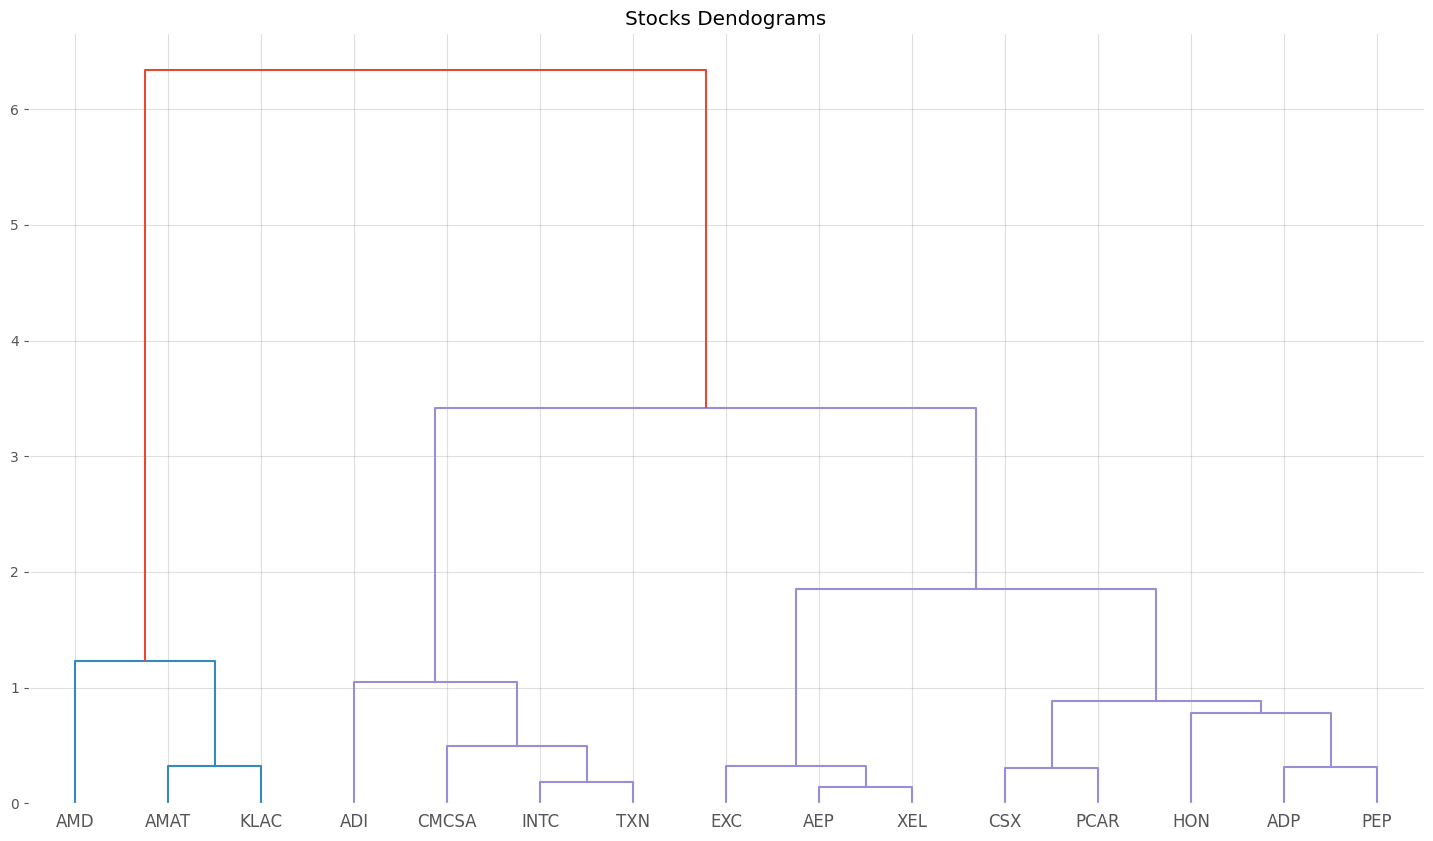

In [27]:
# Plot Dendogram

plt.figure(figsize=(18, 10)
          )
plt.title("Stocks Dendograms")

dendrogram(Z, labels = X.index)

plt.show()

AEP and XEL are the most correlated

AMAT and PCAR are not well correlated

## 👇 <font color = "purple"> Bigger Question 2. ### 

### The second question asks you to run a principal components analysis (PCA) for portfolio management. Begin your analysis with all the above stocks. Make sure to employ the inclusion criterion of less than 30% of missing values.
    
    Your objective is to find the portfolio using PCA.
    
    Select and normalize the four largest components and use them as weights for 
    portfolios that you can compare to an equal-weighted portfolio comprising all stocks.
    
    Identify the profile of the portfolio based on the portfolio weights.
    
    When comparing the performance of each portfolio over the sample period 
    to "the market", assess the performance of other portfolios that capture different 
    return patterns.
    
> Please use 75% of your data for PCA and 25% for backtesting.    
    
### <font color = "green"> NOTE: The investment horizon will be 10 years between 2010 and 2019.

### Below are the lines of code that lead to an answer:

In [28]:
nasdaq100_components = pd.read_html("https://en.wikipedia.org/wiki/Nasdaq-100")[4]

nasdaq100_components

,Company,Symbol,GICS Sector,GICS Sub-Industry
0,Adobe Inc.,ADBE,Information Technology,Application Software
1,Advanced Micro Devices,AMD,Information Technology,Semiconductors
2,Airbnb,ABNB,Consumer Discretionary,"Hotels, Resorts & Cruise Lines"
3,Alphabet Inc. (Class A),GOOGL,Communication Services,Interactive Media & Services
4,Alphabet Inc. (Class C),GOOG,Communication Services,Interactive Media & Services
...,...,...,...,...
96,Vertex Pharmaceuticals,VRTX,Health Care,Biotechnology
97,Warner Bros. Discovery,WBD,Communication Services,Broadcasting
98,"Workday, Inc.",WDAY,Information Technology,Application Software
99,Xcel Energy,XEL,Utilities,Multi-Utilities


In [29]:
nasdaq_tickers = list(nasdaq100_components["Symbol"])

In [30]:
# yfinance dowwnload DOES NOT include the end date

start="2010-01-01"
end="2020-01-01"

In [31]:
nasdaq_info = yf.download(nasdaq_tickers, 
                          start=start, 
                          end=end)

[*********************100%%**********************]  101 of 101 completed

6 Failed downloads:
['DASH', 'ARM', 'ABNB', 'GFS', 'CEG', 'GEHC']: YFChartError("%ticker%: Data doesn't exist for startDate = 1262322000, endDate = 1577854800")


In [32]:
nasdaq_prices = nasdaq_info["Adj Close"]

In [33]:
missing_values =\
(
    nasdaq_prices
    .isnull() # True (1) vs. False (0)
    .mean()
    .sort_values(ascending = False)
)

missing_values.head(10)

Ticker
ARM     1.000000
DASH    1.000000
CEG     1.000000
GEHC    1.000000
ABNB    1.000000
GFS     1.000000
DDOG    0.971383
CRWD    0.943959
MRNA    0.893482
PDD     0.856518
dtype: float64

In [34]:
drop_list =\
(
    sorted(list(missing_values[missing_values > 0.30]
                .index)
          )
)

nasdaq_prices =\
(
    nasdaq_prices
    .drop(labels = drop_list,
          axis = 1)
)

In [35]:
nasdaq_prices =\
(
    nasdaq_prices
    .fillna(method = "ffill")
)

nasdaq_prices =\
(
    nasdaq_prices
    .dropna(axis = 0)
)

nasdaq_prices.shape

(1815, 84)

In [36]:
Daily_Linear_Return =\
(
    nasdaq_prices
    .pct_change(1)
)

Daily_Linear_Return.head()

Ticker,AAPL,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,AMGN,AMZN,...,SNPS,TMUS,TSLA,TTWO,TXN,VRSK,VRTX,WBD,WDAY,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2012-10-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-15,0.008020,0.012210,0.011808,0.010116,0.022436,0.008840,0.005505,0.003650,0.026428,0.007509,...,0.002492,-0.046296,-0.011216,0.028623,0.034458,-0.000851,-0.005417,0.013006,0.066749,0.004345
2012-10-16,0.023678,0.028147,0.023081,0.005432,0.024451,0.001123,0.021898,-0.025455,0.021109,-0.000983,...,0.019267,-0.027361,0.026711,0.000000,0.018072,0.008300,0.000939,0.005526,0.004236,0.003244
2012-10-17,-0.007972,0.006017,0.002028,0.001688,-0.014688,0.010323,-0.003571,0.033582,0.013175,0.014553,...,-0.000305,-0.006352,0.027084,-0.003478,-0.009050,0.000844,0.012385,-0.010183,0.062308,0.013655
2012-10-18,-0.018569,0.000897,-0.007589,-0.003708,-0.018944,0.005553,0.002688,-0.054152,0.006615,-0.010667,...,-0.007014,0.018265,-0.027065,-0.000873,0.010187,-0.009700,-0.024467,0.008654,-0.035914,0.002127


In [37]:
# You are deleting rows that have returns more than 3SD 
# Operational defition of outliers = data points beyond 3 SD

Daily_Linear_Return =\
(
    Daily_Linear_Return[Daily_Linear_Return 
                        .apply(lambda x:(x - x.mean()
                                        ).abs() < (3 * x.std()
                                                  )
                              )
                        .all(1)
    ]
)

In [38]:
scaler =\
(
    StandardScaler()
    .fit(Daily_Linear_Return)
)

In [39]:
scaled_nasdaq =\
(
    pd
    .DataFrame(scaler.fit_transform(Daily_Linear_Return),
               columns = Daily_Linear_Return.columns,
               index = Daily_Linear_Return.index)
)

scaled_nasdaq.describe()

Ticker,AAPL,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,AMGN,AMZN,...,SNPS,TMUS,TSLA,TTWO,TXN,VRSK,VRTX,WBD,WDAY,XEL
count,9.240000e+02,9.240000e+02,9.240000e+02,9.240000e+02,9.240000e+02,9.240000e+02,9.240000e+02,9.240000e+02,9.240000e+02,924.000000,...,9.240000e+02,9.240000e+02,9.240000e+02,9.240000e+02,9.240000e+02,9.240000e+02,924.000000,9.240000e+02,9.240000e+02,9.240000e+02
mean,-1.153478e-17,7.689856e-18,7.689856e-18,2.691450e-17,3.075943e-17,-2.691450e-17,-7.689856e-18,-7.689856e-18,-3.075943e-17,0.000000,...,3.844928e-18,1.922464e-17,-3.460435e-17,-1.153478e-17,-2.306957e-17,4.613914e-17,0.000000,1.153478e-17,-7.689856e-18,-2.306957e-17
std,1.000542e+00,1.000542e+00,1.000542e+00,1.000542e+00,1.000542e+00,1.000542e+00,1.000542e+00,1.000542e+00,1.000542e+00,1.000542,...,1.000542e+00,1.000542e+00,1.000542e+00,1.000542e+00,1.000542e+00,1.000542e+00,1.000542,1.000542e+00,1.000542e+00,1.000542e+00
min,-3.407419e+00,-3.781624e+00,-3.703923e+00,-3.913753e+00,-3.591967e+00,-3.020003e+00,-3.697228e+00,-3.699832e+00,-3.534765e+00,-4.256004,...,-3.489086e+00,-3.477318e+00,-3.691692e+00,-3.467724e+00,-3.283052e+00,-3.230190e+00,-4.309704,-3.253219e+00,-3.567165e+00,-3.343479e+00
25%,-5.418031e-01,-6.175250e-01,-6.026063e-01,-6.090988e-01,-5.947767e-01,-6.241156e-01,-5.959314e-01,-6.033804e-01,-6.029078e-01,-0.611348,...,-6.174796e-01,-6.064515e-01,-5.608639e-01,-5.901076e-01,-5.848673e-01,-5.899646e-01,-0.591288,-5.305739e-01,-5.607261e-01,-6.238526e-01
50%,-1.762971e-02,-5.026817e-02,-1.867044e-02,-3.612900e-02,6.925064e-03,3.318678e-02,2.519086e-03,-4.840882e-02,-1.931832e-02,-0.057889,...,6.741082e-03,-3.073495e-03,-3.963314e-02,-2.690292e-02,-4.828873e-03,7.143347e-03,-0.024903,-3.605754e-02,-3.193224e-03,1.992251e-02
75%,6.309116e-01,6.079622e-01,5.957839e-01,6.052867e-01,5.788893e-01,6.375621e-01,6.118988e-01,5.319275e-01,5.807835e-01,0.621635,...,6.254993e-01,5.884629e-01,6.121516e-01,6.032721e-01,6.232301e-01,6.058892e-01,0.595666,5.888370e-01,6.032681e-01,6.206708e-01
max,3.641125e+00,3.414472e+00,3.748307e+00,3.629974e+00,3.793742e+00,3.324211e+00,3.022429e+00,4.049360e+00,3.397423e+00,4.137945,...,3.504531e+00,3.726659e+00,3.663304e+00,3.314804e+00,3.539030e+00,3.847943e+00,3.805575,3.308184e+00,3.737190e+00,3.309177e+00


In [40]:
prop =\
    int(len(scaled_nasdaq) * 0.75)  # 75% for train # 25% for test

X_Train = scaled_nasdaq[    : prop] # First 80% of the data
X_Test  = scaled_nasdaq[prop:     ] # Remaining 20% of the data

X_Train_Raw = Daily_Linear_Return[    :prop]
X_Test_Raw  = Daily_Linear_Return[prop:    ]

In [41]:
stock_tickers =\
(
 scaled_nasdaq
 .columns
 .values
)

stock_tickers

array(['AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AEP', 'AMAT', 'AMD', 'AMGN',
       'AMZN', 'ANSS', 'ASML', 'AVGO', 'AZN', 'BIIB', 'BKNG', 'BKR',
       'CCEP', 'CDNS', 'CHTR', 'CMCSA', 'COST', 'CPRT', 'CSCO', 'CSGP',
       'CSX', 'CTAS', 'CTSH', 'DLTR', 'DXCM', 'EA', 'EXC', 'FANG', 'FAST',
       'FTNT', 'GILD', 'GOOG', 'GOOGL', 'HON', 'IDXX', 'ILMN', 'INTC',
       'INTU', 'ISRG', 'KDP', 'KLAC', 'LIN', 'LRCX', 'LULU', 'MAR',
       'MCHP', 'MDLZ', 'MELI', 'META', 'MNST', 'MRVL', 'MSFT', 'MU',
       'NFLX', 'NVDA', 'NXPI', 'ODFL', 'ON', 'ORLY', 'PANW', 'PAYX',
       'PCAR', 'PEP', 'QCOM', 'REGN', 'ROP', 'ROST', 'SBUX', 'SMCI',
       'SNPS', 'TMUS', 'TSLA', 'TTWO', 'TXN', 'VRSK', 'VRTX', 'WBD',
       'WDAY', 'XEL'], dtype=object)

In [42]:
pca = PCA()

PrincipalComponent = pca.fit(X_Train)

In [43]:
NumEigenValues = 10

<Axes: title={'center': 'Cumulative Explained Variance by Each PC'}>

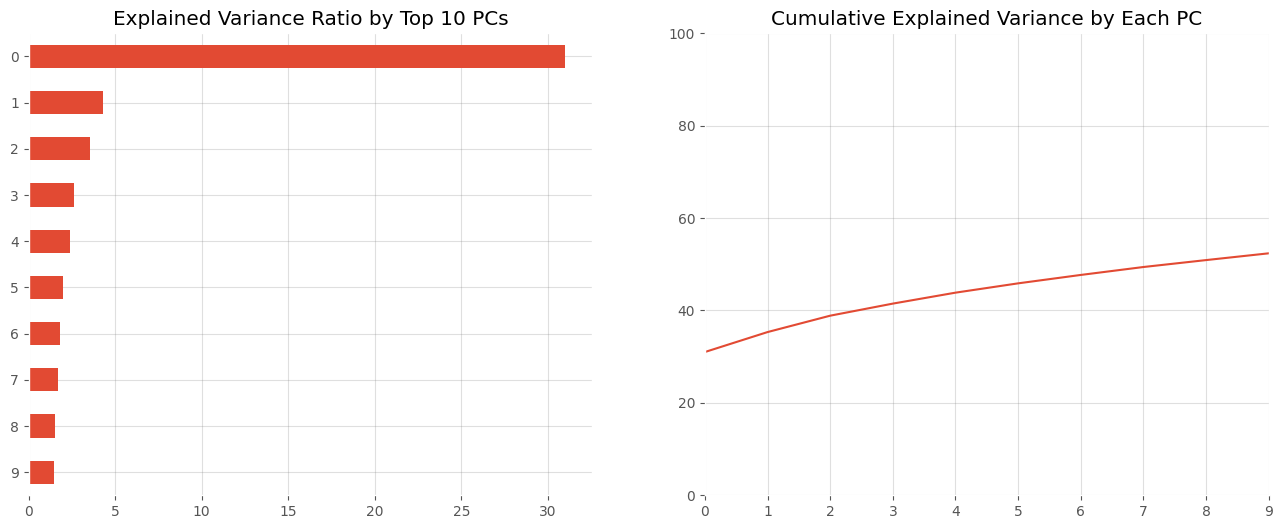

In [44]:
fig, axes =\
(
    plt
    .subplots(ncols = 2,
              figsize = [16, 6]
             )
)

# Plot on the left panel

Series1 =\
(
    pd
    .Series(pca
            .explained_variance_ratio_[ :NumEigenValues]
           )
    .sort_values()
    * 100
)

# Plot on the right panel

Series2 =\
(
    pd
    .Series(pca
            .explained_variance_ratio_[ :NumEigenValues]
           )
    .cumsum()
    * 100
)

(
    Series1
    .plot
    .barh(ylim = (0, 9),
          title = "Explained Variance Ratio by Top 10 PCs",
          ax = axes[0]
         )
)

(
    Series2
    .plot(ylim = (0, 100),
          xlim = (0, 9),
          title = "Cumulative Explained Variance by Each PC",
          ax = axes[1]
         )
)

In [45]:
(
    pd
    .Series(np
           .cumsum(pca
                   .explained_variance_ratio_)
           )
    .to_frame("Explained Variance")
    .head(NumEigenValues)
    .style
    .format("{:,.2%}".format)
)

,Explained Variance
0,31.01%
1,35.33%
2,38.87%
3,41.49%
4,43.86%
5,45.87%
6,47.69%
7,49.41%
8,50.91%
9,52.37%


In [46]:
def PCWeights():

    weights = pd.DataFrame()

    for i in range(len(pca.components_)
                  ):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i]
                                                                  )

    weights = weights.values.T
    return weights # Team, be careful with indentation

In [47]:
weights = PCWeights()

In [48]:
weights

array([[ 1.026e-02,  1.487e-02,  1.422e-02, ...,  1.020e-02,  1.093e-02,
         7.196e-03],
       [-1.964e-01,  2.697e-03, -2.865e-01, ...,  5.282e-03, -1.975e-01,
         7.846e-01],
       [-2.493e-01,  2.605e-01, -7.451e-01, ..., -1.398e-01,  4.829e-01,
        -4.164e-01],
       ...,
       [-7.541e-02, -1.775e-01,  1.111e+00, ...,  3.394e-01,  7.127e-01,
         2.042e+00],
       [ 5.759e-01, -6.329e-01, -4.060e+00, ..., -1.904e-02,  9.025e-01,
         2.008e+01],
       [ 7.234e-01,  1.082e+00, -8.376e-01, ...,  1.876e-01,  1.072e+00,
         2.251e+00]])

In [49]:
# Set the number of principal components to be considered
NumComponents = 5

# Extract the top principal components from the PCA object
# and create a DataFrame with columns named after the original features

topPortfolios =\
(
    pd
    .DataFrame(pca.components_[ : NumComponents],
               columns = nasdaq_prices.columns)
)

# Normalize the weights of the top portfolios such that the weights sum up to 1 for each portfolio
# This is done by dividing each weight by the sum of weights for the respective portfolio

eigen_portfolios =\
(
    topPortfolios
    .div(topPortfolios.sum(1),
         axis = 0)
)

# Rename the index of the eigen_portfolios DataFrame for better readability

eigen_portfolios.index = [f"Portfolio {i}" for i in range(NumComponents)
                         ]

# Calculate the square root of the explained variance for each component
# This provides the standard deviation of returns for each eigenportfolio

np.sqrt(pca.explained_variance_)

array([5.062, 1.888, 1.711, 1.469, 1.399, 1.29 , 1.225, 1.191, 1.113,
       1.1  , 1.076, 1.052, 1.034, 1.011, 1.006, 0.982, 0.959, 0.953,
       0.927, 0.92 , 0.917, 0.904, 0.9  , 0.892, 0.872, 0.871, 0.856,
       0.851, 0.844, 0.831, 0.82 , 0.819, 0.804, 0.798, 0.791, 0.78 ,
       0.779, 0.775, 0.769, 0.752, 0.745, 0.74 , 0.737, 0.724, 0.717,
       0.711, 0.698, 0.696, 0.693, 0.689, 0.679, 0.675, 0.67 , 0.662,
       0.647, 0.647, 0.643, 0.636, 0.626, 0.622, 0.619, 0.605, 0.602,
       0.595, 0.588, 0.583, 0.562, 0.556, 0.551, 0.55 , 0.543, 0.535,
       0.52 , 0.513, 0.495, 0.48 , 0.476, 0.463, 0.44 , 0.426, 0.423,
       0.415, 0.336, 0.096])

In [50]:
eigen_portfolios

Ticker,AAPL,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,AMGN,AMZN,...,SNPS,TMUS,TSLA,TTWO,TXN,VRSK,VRTX,WBD,WDAY,XEL
Portfolio 0,0.010256,0.014874,0.014225,0.015574,0.013911,0.007007,0.013953,0.008391,0.013201,0.013824,...,0.013743,0.009800,0.007202,0.011056,0.015412,0.013253,0.011949,0.010198,0.010932,0.007196
Portfolio 1,-0.196387,0.002697,-0.286542,0.288108,-0.188365,0.746435,-0.278289,-0.238099,0.038137,0.047016,...,-0.059165,0.016409,-0.107694,-0.128115,-0.176269,0.234993,-0.234286,0.005282,-0.197493,0.784633
Portfolio 2,-0.249265,0.260497,-0.745113,-0.107295,0.155256,-0.504937,-0.726244,-0.143884,1.014436,0.691720,...,0.191695,0.137669,0.365659,0.077303,-0.766112,0.181567,1.143512,-0.139808,0.482897,-0.416444
Portfolio 3,-0.197888,-0.270743,0.215937,-0.052731,-0.123376,0.701688,0.016499,-0.008582,0.836303,-0.608459,...,-0.192380,0.130163,-0.260941,-0.173971,0.060750,-0.169527,0.742444,0.034693,-0.280475,0.589548
Portfolio 4,-3.844751,-3.164488,-2.854228,1.188063,0.651560,-7.519503,-3.187616,-3.942277,0.205376,-3.905296,...,-0.312399,1.014620,-1.131410,-3.956065,-3.193913,4.128342,-0.060678,9.129405,-4.572578,-7.030858


array([[<Axes: title={'center': 'Portfolio 0'}, xlabel='Ticker'>],
       [<Axes: title={'center': 'Portfolio 1'}, xlabel='Ticker'>],
       [<Axes: title={'center': 'Portfolio 2'}, xlabel='Ticker'>],
       [<Axes: title={'center': 'Portfolio 3'}, xlabel='Ticker'>],
       [<Axes: title={'center': 'Portfolio 4'}, xlabel='Ticker'>]],
      dtype=object)

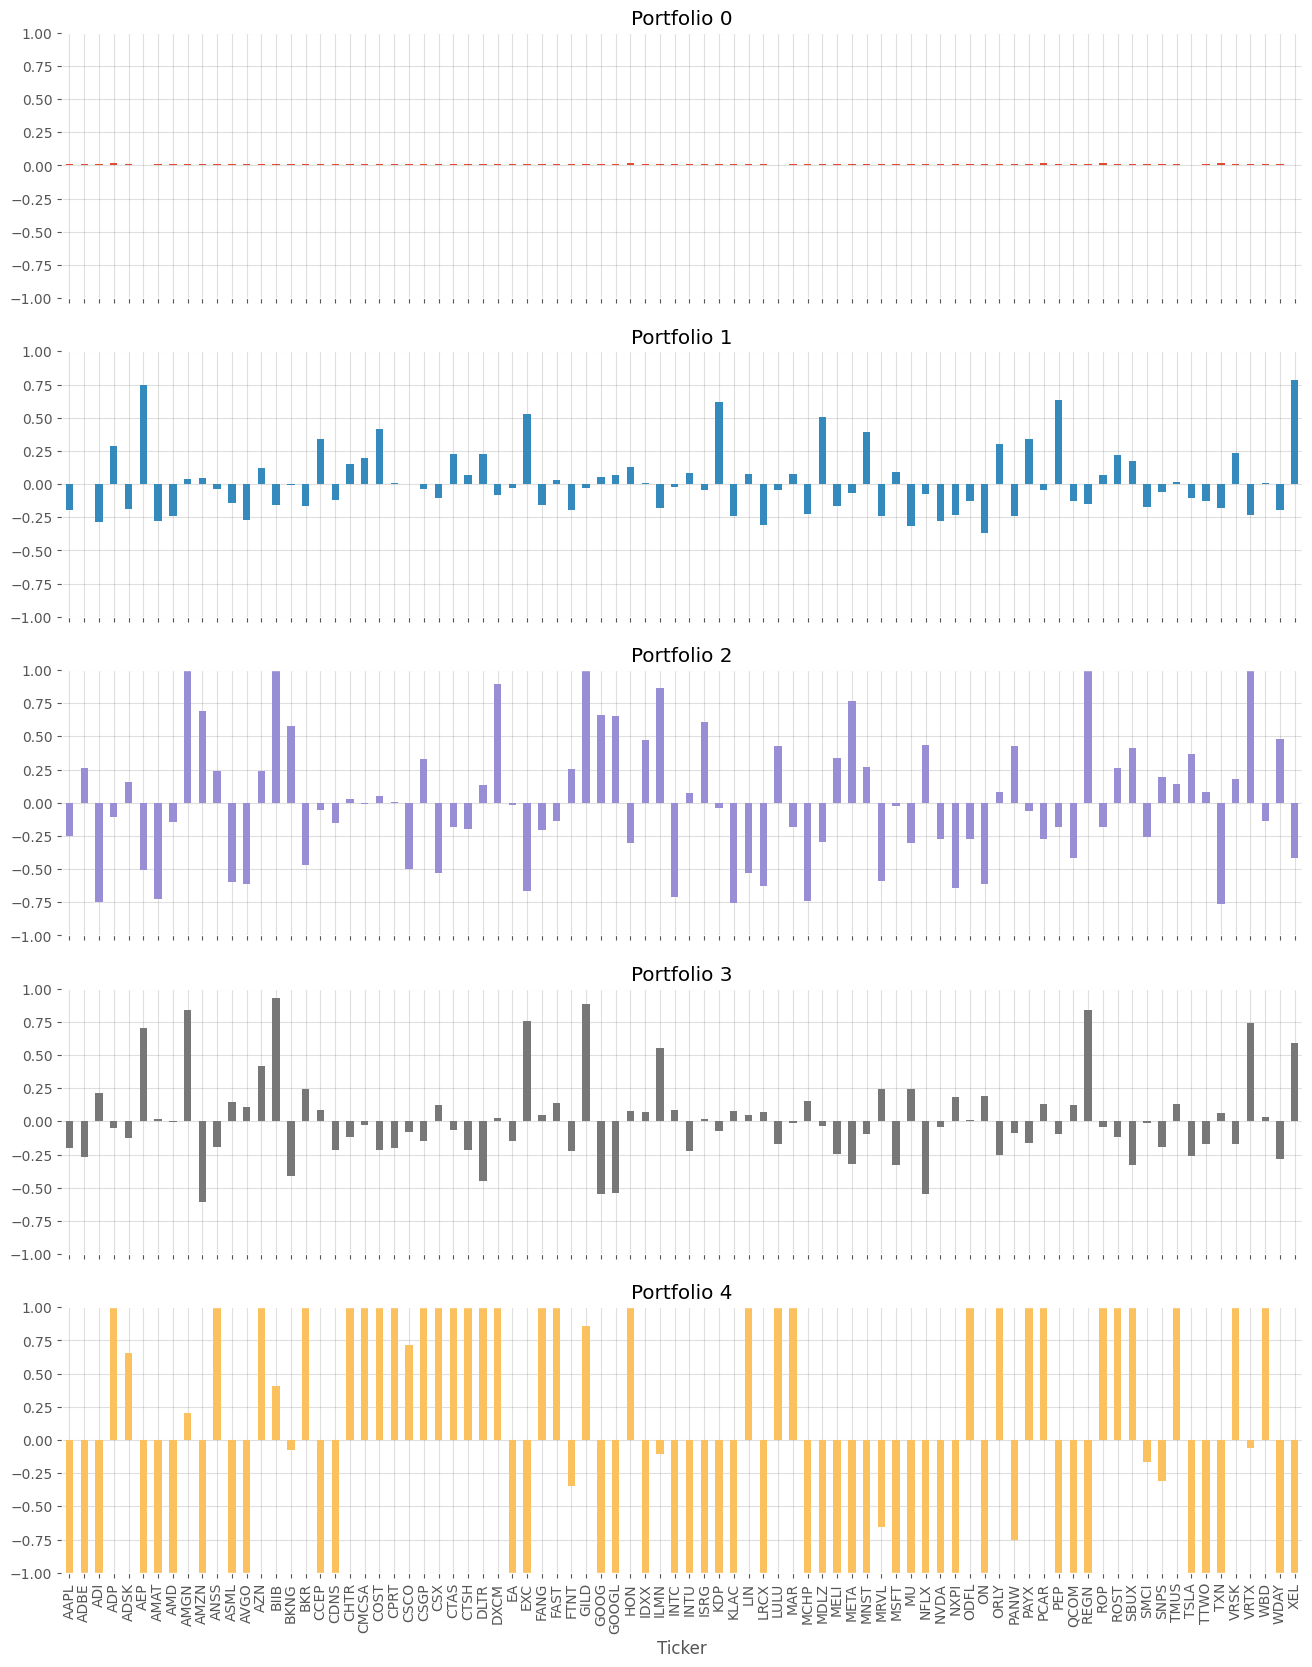

In [51]:
(
    eigen_portfolios
    .T  # Transpose the DataFrame to have portfolios as columns and assets as rows
    .plot
    .bar(subplots = True,
         layout = (int(NumComponents), 1),
         legend = False,
         sharey = True,
         figsize = [16, 20],
         ylim = [-1, 1]
        )
)

In [52]:
def calculate_sharpe_ratio(ts_returns, periods_per_year = 252):

    n_years = ts_returns.shape[0] / periods_per_year

    annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
                                ) - 1

    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)

    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

In [53]:
def valid_backtest_PCA_porfolios(eigen):
    
    eigen_prtfi =\
        (
            pd
            .DataFrame(data = {"weights": eigen.squeeze()
                              },
                       index = stock_tickers)
        )

    # Sanity Check: Ensure the order of tickers in X_Test_Raw matches the order in eigen
    if not list(eigen_prtfi.index) == list(X_Test_Raw.columns): 
        raise ValueError("Sanity check failed: Mismatch in number of tickers between X_Test_Raw and eigen.")
    else:
        print("Prof. Roh's Message: 'Sanity check succeeded :)' The order of tickers in X_Test_Raw matches the order in eigen.")
    
    # Let's directly compute the dot product without sorting
    eigen_prtfi_returns =\
    (
        np
        .dot(X_Test_Raw, eigen)
    )
    
    eigen_portfolio_returns =\
    (
        pd
        .Series(eigen_prtfi_returns.squeeze(),
                index = X_Test_Raw.index)
    )

    returns, vol, sharpe = calculate_sharpe_ratio(eigen_portfolio_returns)

    print("Our PCA-based Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f"  %
          (returns * 100, vol * 100, sharpe)
         )

    # Compared with what? Equal-weightage Portfolio

    equal_weight_return =\
    (
        X_Test_Raw * (1 / len(pca.components_)
                     )
    ).sum(axis = 1)

    df_plot =\
        (
            pd
            .DataFrame({"ML Portfolio Return": eigen_portfolio_returns,
                        "Equal Weight Index": equal_weight_return},
                      index = X_Test.index
                      )
        )

    (
        np
        .cumprod(df_plot + 1)
        .plot(title = "Returns of the equal weighted index vs. Eigen-Portfolio",
              figsize = [16, 8]
             )
    )

    plt.show()

### <font color = red> Answer 2 is presented in the cell below: </font>

Prof. Roh's Message: 'Sanity check succeeded :)' The order of tickers in X_Test_Raw matches the order in eigen.
Our PCA-based Portfolio:
Return = 57.23%
Volatility = 11.57%
Sharpe = 4.95


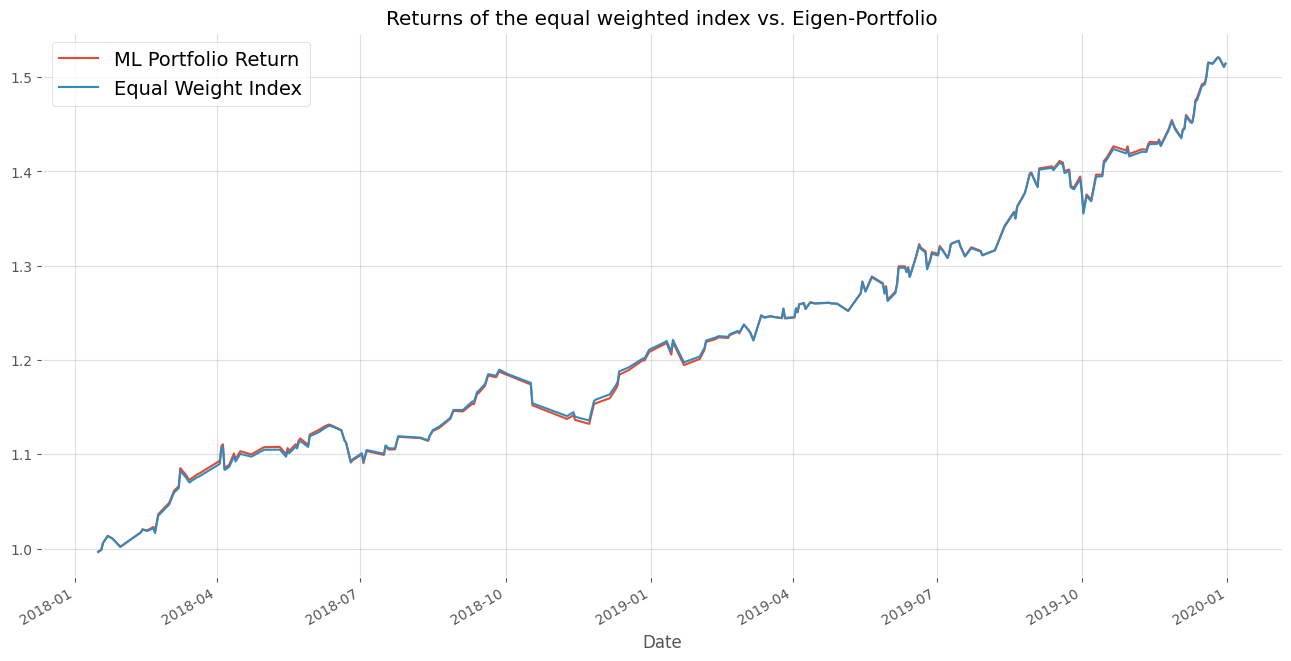

In [54]:
valid_backtest_PCA_porfolios(eigen = weights[0]
                             )

Prof. Roh's Message: 'Sanity check succeeded :)' The order of tickers in X_Test_Raw matches the order in eigen.
Our PCA-based Portfolio:
Return = -61.57%
Volatility = 100.94%
Sharpe = -0.61


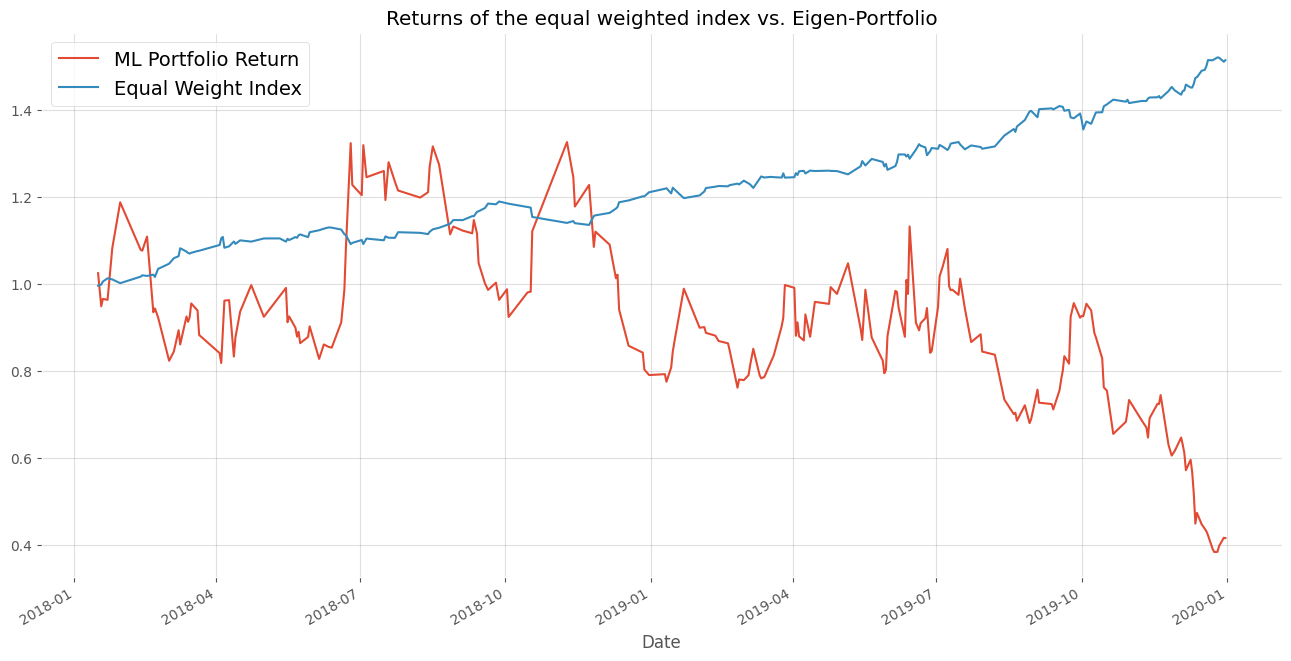

In [55]:
valid_backtest_PCA_porfolios(eigen = weights[1]
                             )

Prof. Roh's Message: 'Sanity check succeeded :)' The order of tickers in X_Test_Raw matches the order in eigen.
Our PCA-based Portfolio:
Return = -30.51%
Volatility = 176.45%
Sharpe = -0.17


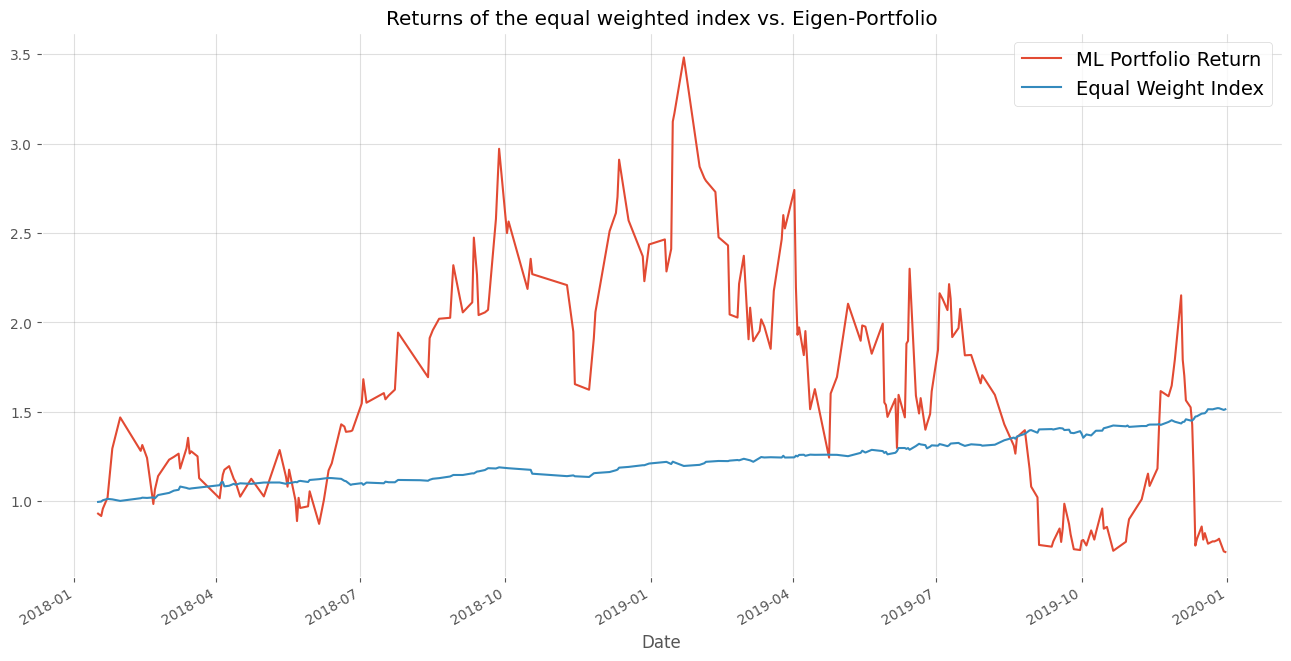

In [56]:
valid_backtest_PCA_porfolios(eigen = weights[2]
                             )

Prof. Roh's Message: 'Sanity check succeeded :)' The order of tickers in X_Test_Raw matches the order in eigen.
Our PCA-based Portfolio:
Return = -73.53%
Volatility = 89.34%
Sharpe = -0.82


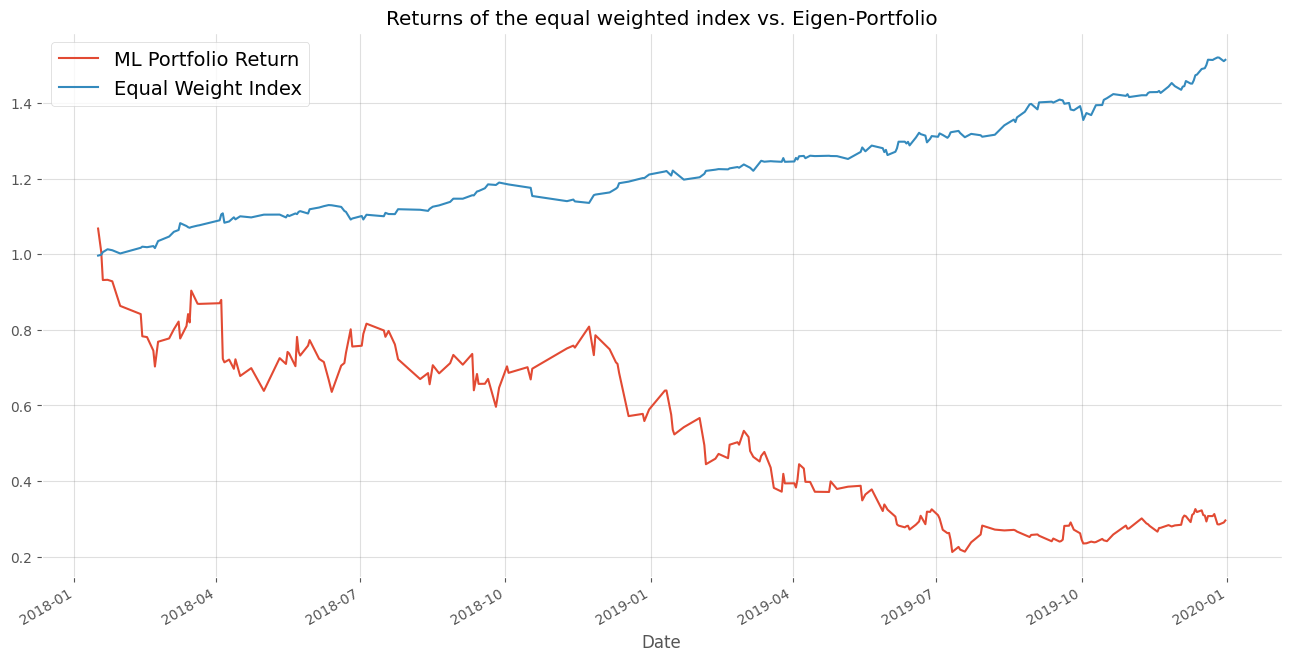

In [57]:
valid_backtest_PCA_porfolios(eigen = weights[3]
                             )

### <font color = blue> 👉 Questions 3. Using `yfinance`, extract the stock prices of the following ticker symbols, between July 2015 and June 2019.

- General Motors `GM`
- Marriott `MAR`
- Pfizer `PFE`
- ExxonMobil `XOM`
- The Walt Disney Company `DIS`
- Bank of America `BAC`
- Proctor & Gamble `PG`
- Hilton `HLT`
- Walmart `WMT`
- Twitter `TWTR`

### Then, calculate simple daily percentage changes in the stock prices, and store them into an object, printing the results into an output cell.

### Below are the lines of code that lead to an answer:

In [58]:
q3_tickers = ["GM","MAR","PFE","XOM","DIS","BAC","PG","HLT","WMT","TWTR"]

In [59]:
# yfinance dowwnload DOES NOT include the end date

start="2015-07-01"
end="2019-07-01"

In [60]:
q3_info = yf.download(q3_tickers, 
                      start=start, 
                      end=end)

[*********************100%%**********************]  10 of 10 completed

1 Failed download:
['TWTR']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


In [61]:
q3_prices = q3_info["Adj Close"]

In [62]:
missing_values =\
(
    q3_prices
    .isnull() # True (1) vs. False (0)
    .mean()
    .sort_values(ascending = False)
)

missing_values.head(10)

Ticker
TWTR    1.0
BAC     0.0
DIS     0.0
GM      0.0
HLT     0.0
MAR     0.0
PFE     0.0
PG      0.0
WMT     0.0
XOM     0.0
dtype: float64

In [63]:
drop_list =\
(
    sorted(list(missing_values[missing_values > 0.30]
                .index)
          )
)

q3_prices =\
(
    q3_prices
    .drop(labels = drop_list,
          axis = 1)
)

In [64]:
q3_prices =\
(
    q3_prices
    .fillna(method = "ffill")
)

q3_prices =\
(
    q3_prices
    .dropna(axis = 0)
)

q3_prices.shape

(1006, 9)

In [65]:
Daily_Linear_Return =\
(
    q3_prices
    .pct_change(1)
)

In [66]:
Daily_Linear_Return =\
(
    Daily_Linear_Return
    .dropna(axis = 0)
)

### <font color = red> Answer 3 is presented in the cell below: </font>

In [67]:
Daily_Linear_Return.head()

Ticker,BAC,DIS,GM,HLT,MAR,PFE,PG,WMT,XOM
Date,,,,,,,,,
2015-07-02,-0.011034,-0.001390,0.005751,0.000000,-0.002534,-0.009499,0.002634,-0.000278,0.009348
2015-07-06,-0.005285,0.006350,-0.017454,0.000720,-0.006551,-0.003596,0.001502,0.009324,-0.007337
2015-07-07,-0.014758,0.012100,0.006432,0.001799,0.015207,0.014436,0.020862,0.017372,0.004120
2015-07-08,-0.026363,-0.016311,-0.050822,-0.022980,-0.019618,-0.008301,-0.008933,-0.009893,-0.010860
2015-07-09,0.014154,0.003559,-0.005771,0.002573,0.002975,0.012257,-0.004075,-0.003832,-0.004514


### <font color = blue> 👉 Questions 4. Using a box-and-whisker plot, compare the performance of the stocks over the given period of time. Find the stock with the highest variability and risk, based on the visualization.

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 4 is presented in the cell below: </font>

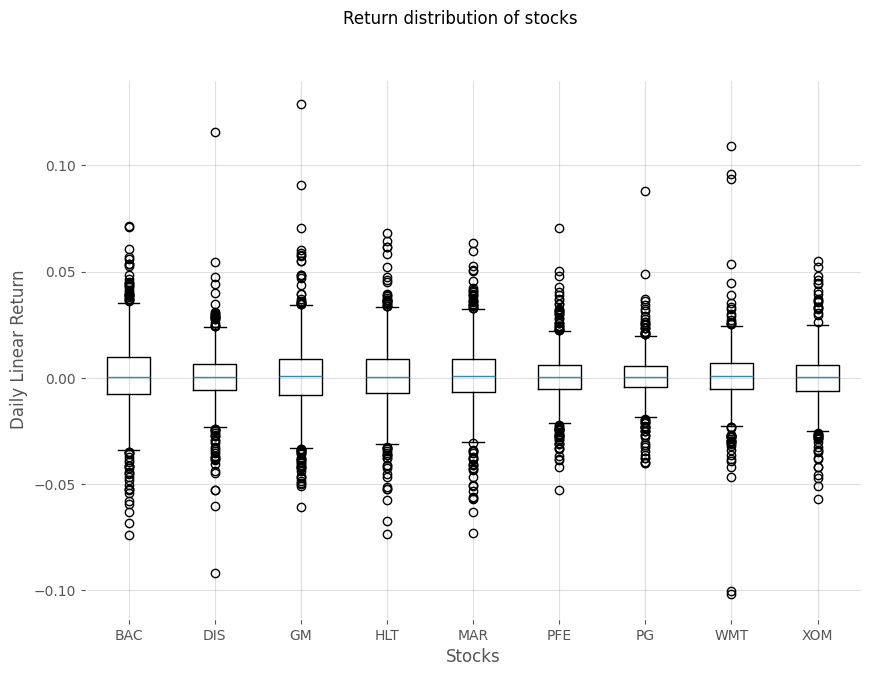

In [68]:
fig = plt.figure(figsize =(10, 7))

fig.suptitle("Return distribution of stocks")

# Creating plot
plt.boxplot(Daily_Linear_Return)

# Adding labels
plt.xlabel("Stocks")  # Replace with your actual label
plt.ylabel("Daily Linear Return")  # Adjust as needed

# Adding custom x-axis labels
plt.xticks(ticks=range(1, len(Daily_Linear_Return.columns) + 1), 
           labels=Daily_Linear_Return.columns)

# show plot
plt.show()

### <font color = blue> 👉 Questions 5. Create your own function to compare daily percentage changes between stocks, using a scatter plot and its distribution relative to a perfect diagonal (regression line). 

### Assess which of the following pairs seem to show the closest relationships.

1. ExxonMobil (`XOM`) and General Motors (`GM`)
2. Twitter (`TWTR`) and The Walt Disney Company (`DIS`)
3. Marriott (`MAR`) and Hilton (`HLT`)
4. Pfeizer (`PFE`) and Proctor & Gamble (`PG`)
5. Bank of America (`BAC`) and Walmart (`WMT`)

### Upon completion of the above, please execute more tasks for the sake of this question. 

### As you have learned in class, if you wish to look for all combinations of stocks you can use the scatter matrix graph provided by the `pandas` module. Create the scatter matrix, along with a Kernel Density Estimation on the diagonal.

### Below are the lines of code that lead to an answer:

# Refer to Lesson 2, Section 3

In [ ]:
def regression(x, y):
    ols = np.polyfit(x, y, deg=1)
    slope = ols[0]  # The slope of the regression line

    plt.figure(figsize=(10, 10))
    
    # Scatter plot of x and y
    plt.plot(x, y, "ro", label="Data Points")
    
    # Linear regression line
    plt.plot(x, np.polyval(ols, x), "b", label="Linear Regression")
    
    # Adding axis labels
    plt.xlabel(x.name)  # Replace with your x-axis label
    plt.ylabel(y.name)  # Replace with your y-axis label
    
    # Adding legend
    plt.legend(loc=0)
    
    plt.plot((-0.1, 0.1),
            (-0.1, 0.1),
            color = "green") # diagonal line benchmark
    
    # Display slope on the plot
    plt.text(0.05, 0.95, f"Slope: {slope:.2f}", transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top', color="blue")
    
    # Show plot
    plt.show()

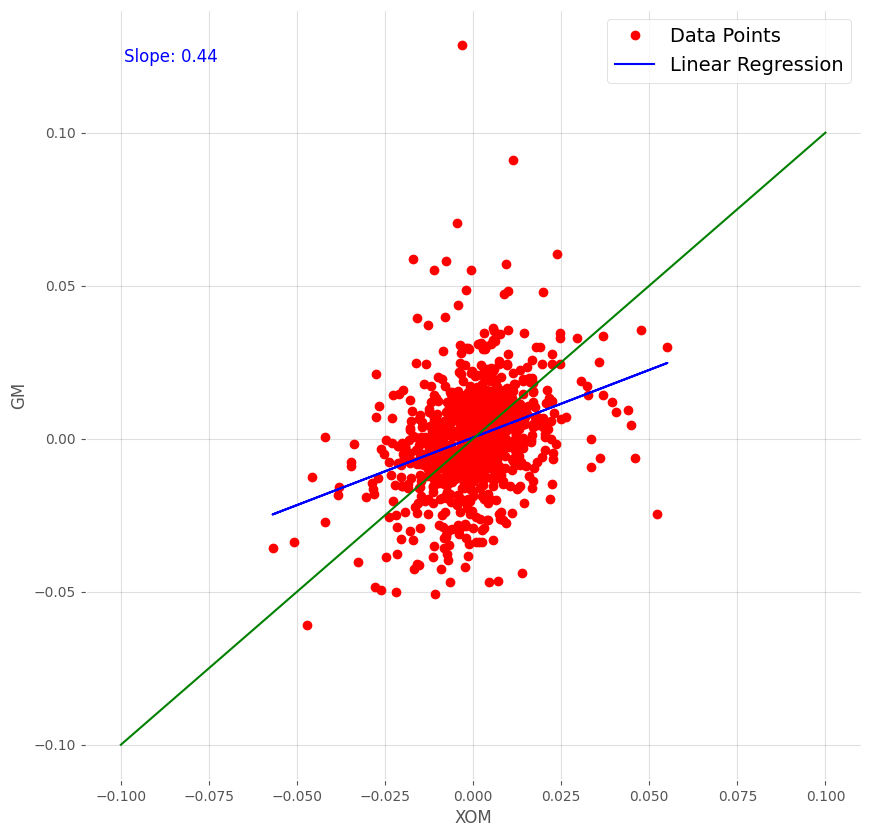

In [70]:
regression(Daily_Linear_Return["XOM"],
           Daily_Linear_Return["GM"])

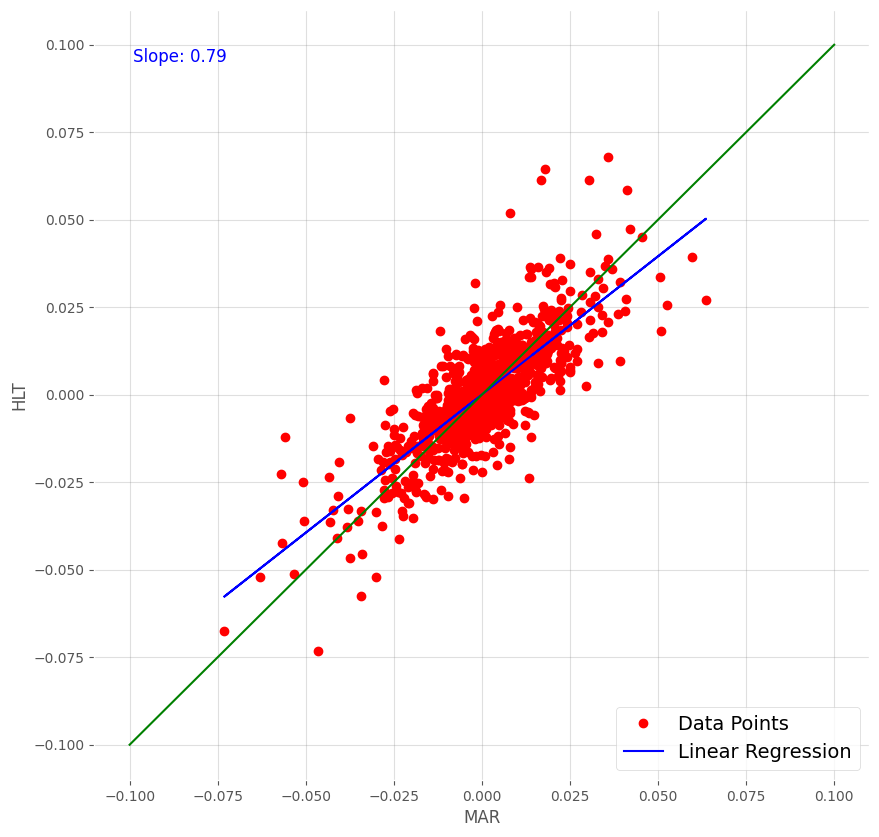

In [71]:
regression(Daily_Linear_Return["MAR"],
           Daily_Linear_Return["HLT"])

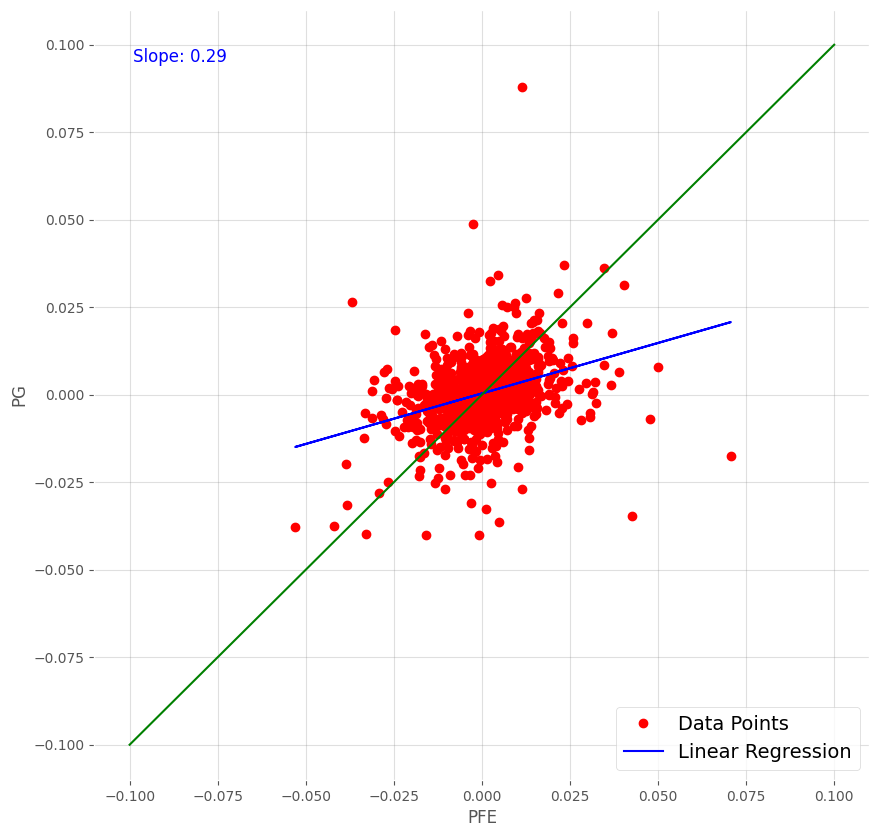

In [72]:
regression(Daily_Linear_Return["PFE"],
           Daily_Linear_Return["PG"])

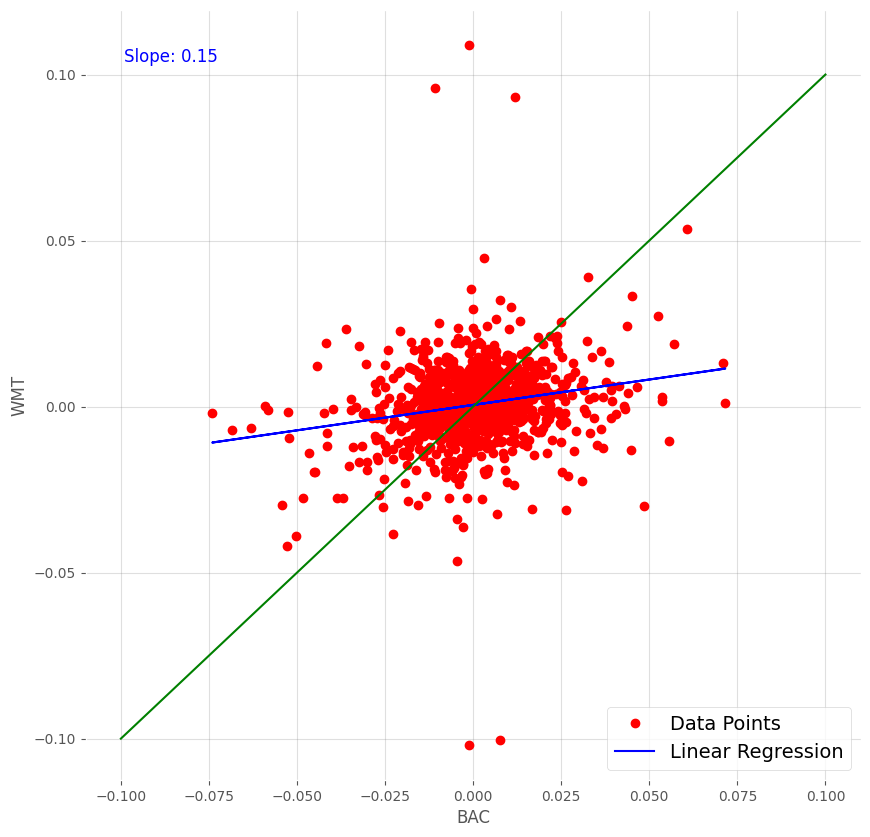

In [73]:
regression(Daily_Linear_Return["BAC"],
           Daily_Linear_Return["WMT"])

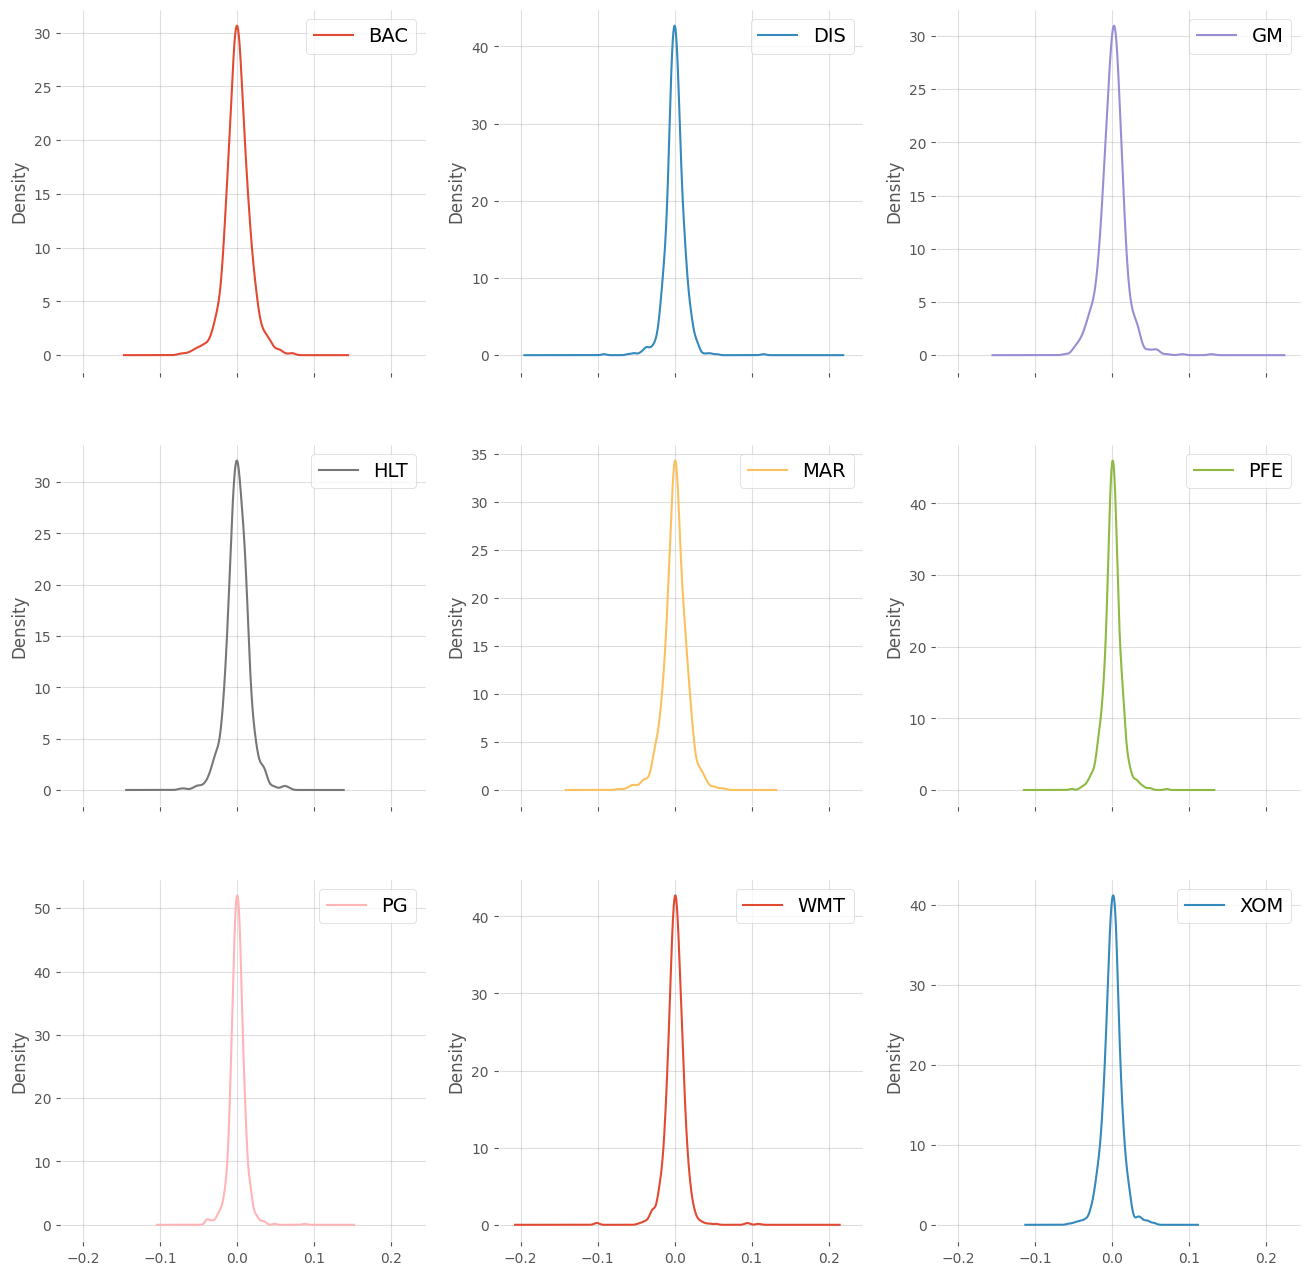

In [74]:
# Team, use this--kernel density estimation

(
    Daily_Linear_Return.
    plot(kind = "density",
         subplots = True,
         layout = (3, 3),
         sharex = True,
         legend = True,
         figsize = [16, 16]
        )
)

plt.show()

### <font color = red> Answer 5 is presented in the cell below: </font>

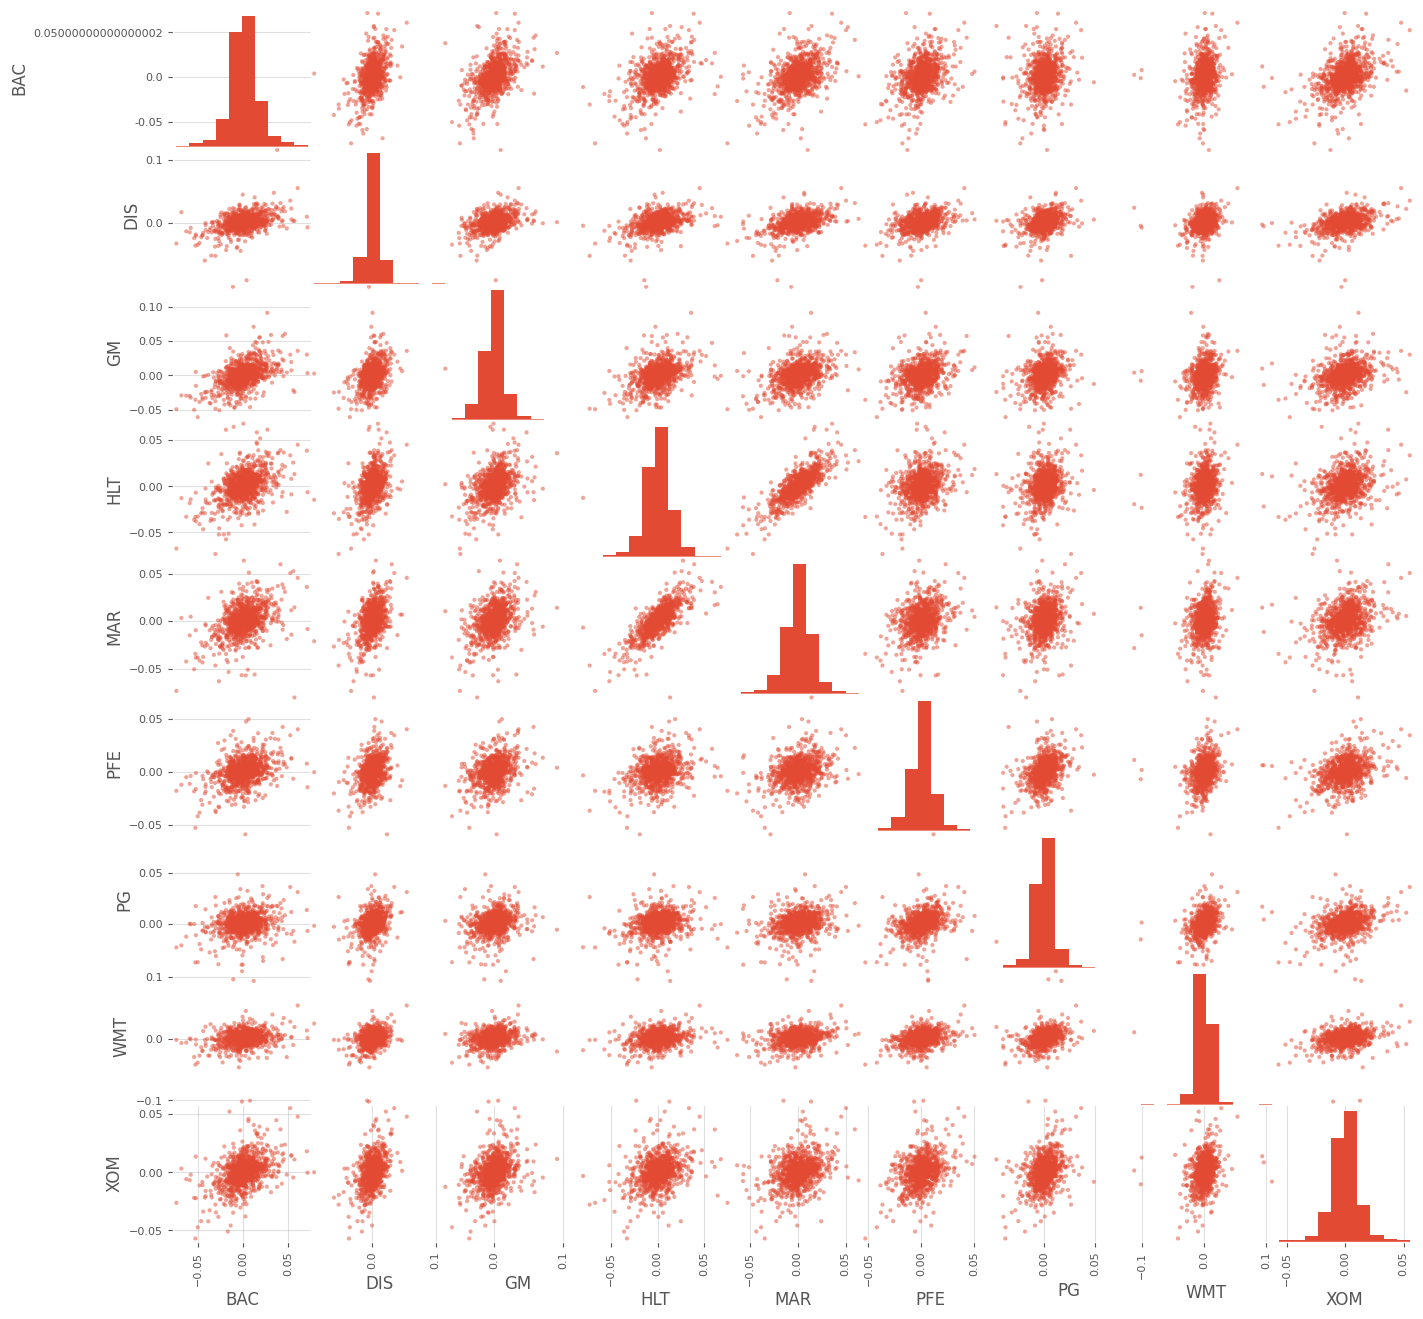

In [75]:
scatter_matrix(Daily_Linear_Return,
               figsize = (16, 16)
              )
plt.show()

### <font color = blue> 👉 Question 6. It is often useful to analyze stock performance against a market index such as the S&P 500. This will give a sense of how a stock price compares to movements in the overall market.

### Carry out the following analysis steps.

<font color = green>

> ### 1. Extract the S&P 500 (`^GSPC`) data for the same time period used for the stocks in Question 1.

> ### 2. In order to perform comparisons, you must run the same calculations to derive the daily percentage changes and cumulative returns on the index. You might first want to concatenate the index calculations in the results of the calculations of the stocks with respect to daily percentage changes. The process will lead you to efficiently compare the overall set of stocks and index calculations for daily percentage changes.

> ### 3. Calculate the cumulative daily returns.

> ### 4. To complete this analysis, calculate the correlation of the daily percentage change values.

> ### 5. Using location accessor, print only the correlational coefficients of each stock relative to the S&P 500, in descending order.

</font> 
        
### Which stock price moved in the most similar way to the S&P 500? Which moved in the least similar way?

### Below are the lines of code that lead to an answer:

In [76]:
SP500_tickers = ["^GSPC"]

In [77]:
# yfinance dowwnload DOES NOT include the end date

start="2015-07-01"
end="2019-07-01"

In [78]:
SP500_info = yf.download(SP500_tickers, 
                      start=start, 
                      end=end)

[*********************100%%**********************]  1 of 1 completed


In [79]:
SP500_prices = SP500_info["Adj Close"]

In [80]:
SP500_prices

Date
2015-07-01    2077.419922
2015-07-02    2076.780029
2015-07-06    2068.760010
2015-07-07    2081.340088
2015-07-08    2046.680054
                 ...     
2019-06-24    2945.350098
2019-06-25    2917.379883
2019-06-26    2913.780029
2019-06-27    2924.919922
2019-06-28    2941.760010
Name: Adj Close, Length: 1006, dtype: float64

In [81]:
SP500_Daily_Linear_Return =\
(
    SP500_prices
    .pct_change(1)
)

In [82]:
SP500_Daily_Linear_Return =\
(
    SP500_Daily_Linear_Return
    .dropna(axis = 0)
)

In [83]:
SP500_Daily_Linear_Return

Date
2015-07-02   -0.000308
2015-07-06   -0.003862
2015-07-07    0.006081
2015-07-08   -0.016653
2015-07-09    0.002262
                ...   
2019-06-24   -0.001732
2019-06-25   -0.009496
2019-06-26   -0.001234
2019-06-27    0.003823
2019-06-28    0.005757
Name: Adj Close, Length: 1005, dtype: float64

In [84]:
Daily_Linear_Return = Daily_Linear_Return.merge(SP500_Daily_Linear_Return,
                                                how="inner",
                                                left_index=True,
                                                right_index=True)

In [85]:
Daily_Linear_Return.rename(columns = {"Adj Close":"SP500"},inplace=True)

In [86]:
Daily_Linear_Return

,BAC,DIS,GM,HLT,MAR,PFE,PG,WMT,XOM,SP500
Date,,,,,,,,,,
2015-07-02,-0.011034,-0.001390,0.005751,0.000000,-0.002534,-0.009499,0.002634,-0.000278,0.009348,-0.000308
2015-07-06,-0.005285,0.006350,-0.017454,0.000720,-0.006551,-0.003596,0.001502,0.009324,-0.007337,-0.003862
2015-07-07,-0.014758,0.012100,0.006432,0.001799,0.015207,0.014436,0.020862,0.017372,0.004120,0.006081
2015-07-08,-0.026363,-0.016311,-0.050822,-0.022980,-0.019618,-0.008301,-0.008933,-0.009893,-0.010860,-0.016653
2015-07-09,0.014154,0.003559,-0.005771,0.002573,0.002975,0.012257,-0.004075,-0.003832,-0.004514,0.002262
...,...,...,...,...,...,...,...,...,...,...
2019-06-24,-0.004979,-0.007202,0.001083,-0.006553,-0.002262,0.002061,0.010162,0.000990,-0.009525,-0.001732
2019-06-25,-0.007863,0.005172,0.019481,-0.023662,-0.025446,0.000000,-0.005430,-0.004675,-0.008837,-0.009496
2019-06-26,0.005403,0.003287,0.011943,0.013619,0.017782,-0.017596,-0.017813,-0.005058,0.004326,-0.001234


In [87]:
Cumulative_return = (1+Daily_Linear_Return).cumprod()

In [88]:
Cumulative_return 

,BAC,DIS,GM,HLT,MAR,PFE,PG,WMT,XOM,SP500
Date,,,,,,,,,,
2015-07-02,0.988966,0.998610,1.005751,1.000000,0.997466,0.990501,1.002634,0.999722,1.009348,0.999692
2015-07-06,0.983740,1.004951,0.988196,1.000720,0.990932,0.986940,1.004140,1.009043,1.001942,0.995831
2015-07-07,0.969222,1.017111,0.994552,1.002520,1.006001,1.001187,1.025088,1.026572,1.006070,1.001887
2015-07-08,0.943670,1.000521,0.944007,0.979482,0.986265,0.992876,1.015931,1.016416,0.995144,0.985203
2015-07-09,0.957027,1.004082,0.938559,0.982002,0.989198,1.005046,1.011791,1.012521,0.990652,0.987432
...,...,...,...,...,...,...,...,...,...,...
2019-06-24,1.735597,1.274374,1.328072,1.741686,1.926548,1.500318,1.604335,1.716192,1.088765,1.417792
2019-06-25,1.721951,1.280965,1.353944,1.700473,1.877525,1.500318,1.595623,1.708170,1.079144,1.404328
2019-06-26,1.731255,1.285175,1.370113,1.723633,1.910911,1.473918,1.567201,1.699530,1.083812,1.402596


<Axes: title={'center': 'A Heatmap for Correlation Matrix'}>

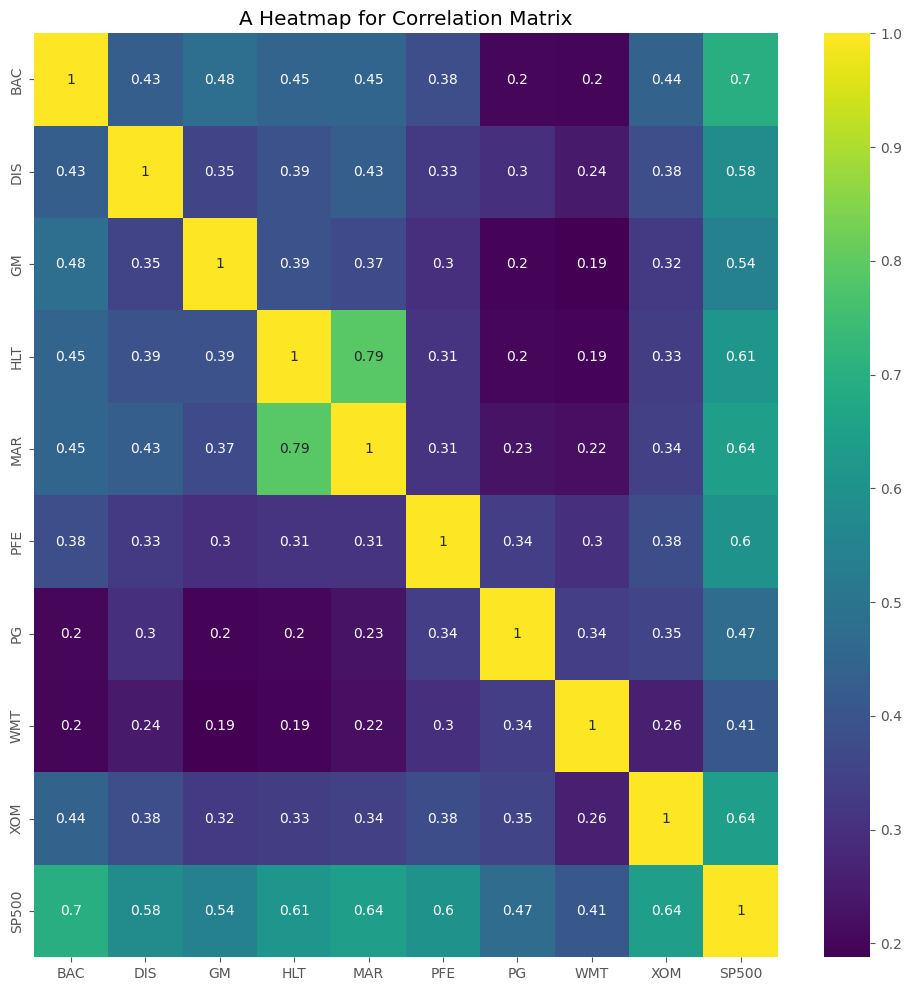

In [89]:
corr = Daily_Linear_Return.corr()

plt.figure(figsize = [12, 12]
          )

plt.title("A Heatmap for Correlation Matrix")

sns \
    .heatmap(corr,
             annot = True,
             cmap = "viridis")

### <font color = red> Answer 6 is presented in the cell below: </font>

In [90]:
corr.loc["SP500"].sort_values(ascending=False)

SP500    1.000000
BAC      0.696444
MAR      0.640799
XOM      0.639785
HLT      0.613842
PFE      0.599860
DIS      0.578363
GM       0.541119
PG       0.472333
WMT      0.408003
Name: SP500, dtype: float64

### <font color = blue> 👉 Question 7. One common type of data visualization in finance is a stock’s trading volume relative to its closing price.

### Create a chart below after obtaining the data from Yahoo Finance!, using `yfinance`. The target symbol is `AMZN`, and our period of interest is between January 2007 and December 2009. 

### Below are the lines of code that lead to an answer:

In [91]:
q7_tickers = ["AMZN"]

In [92]:
# yfinance dowwnload DOES NOT include the end date

start="2007-01-01"
end="2010-01-01"

In [93]:
q7_info = yf.download(q7_tickers, 
                      start=start, 
                      end=end)

[*********************100%%**********************]  1 of 1 completed


In [94]:
q7_info = q7_info[["Adj Close", "Volume"]]

In [95]:
q7_info

,Adj Close,Volume
Date,,
2007-01-03,1.9350,248102000
2007-01-04,1.9450,126368000
2007-01-05,1.9185,132394000
2007-01-08,1.8750,135660000
2007-01-09,1.8890,114060000
...,...,...
2009-12-24,6.9235,102576000
2009-12-28,6.9655,175278000
2009-12-29,6.9705,168012000


### <font color = red> Answer 7 is presented in the cell below: </font>

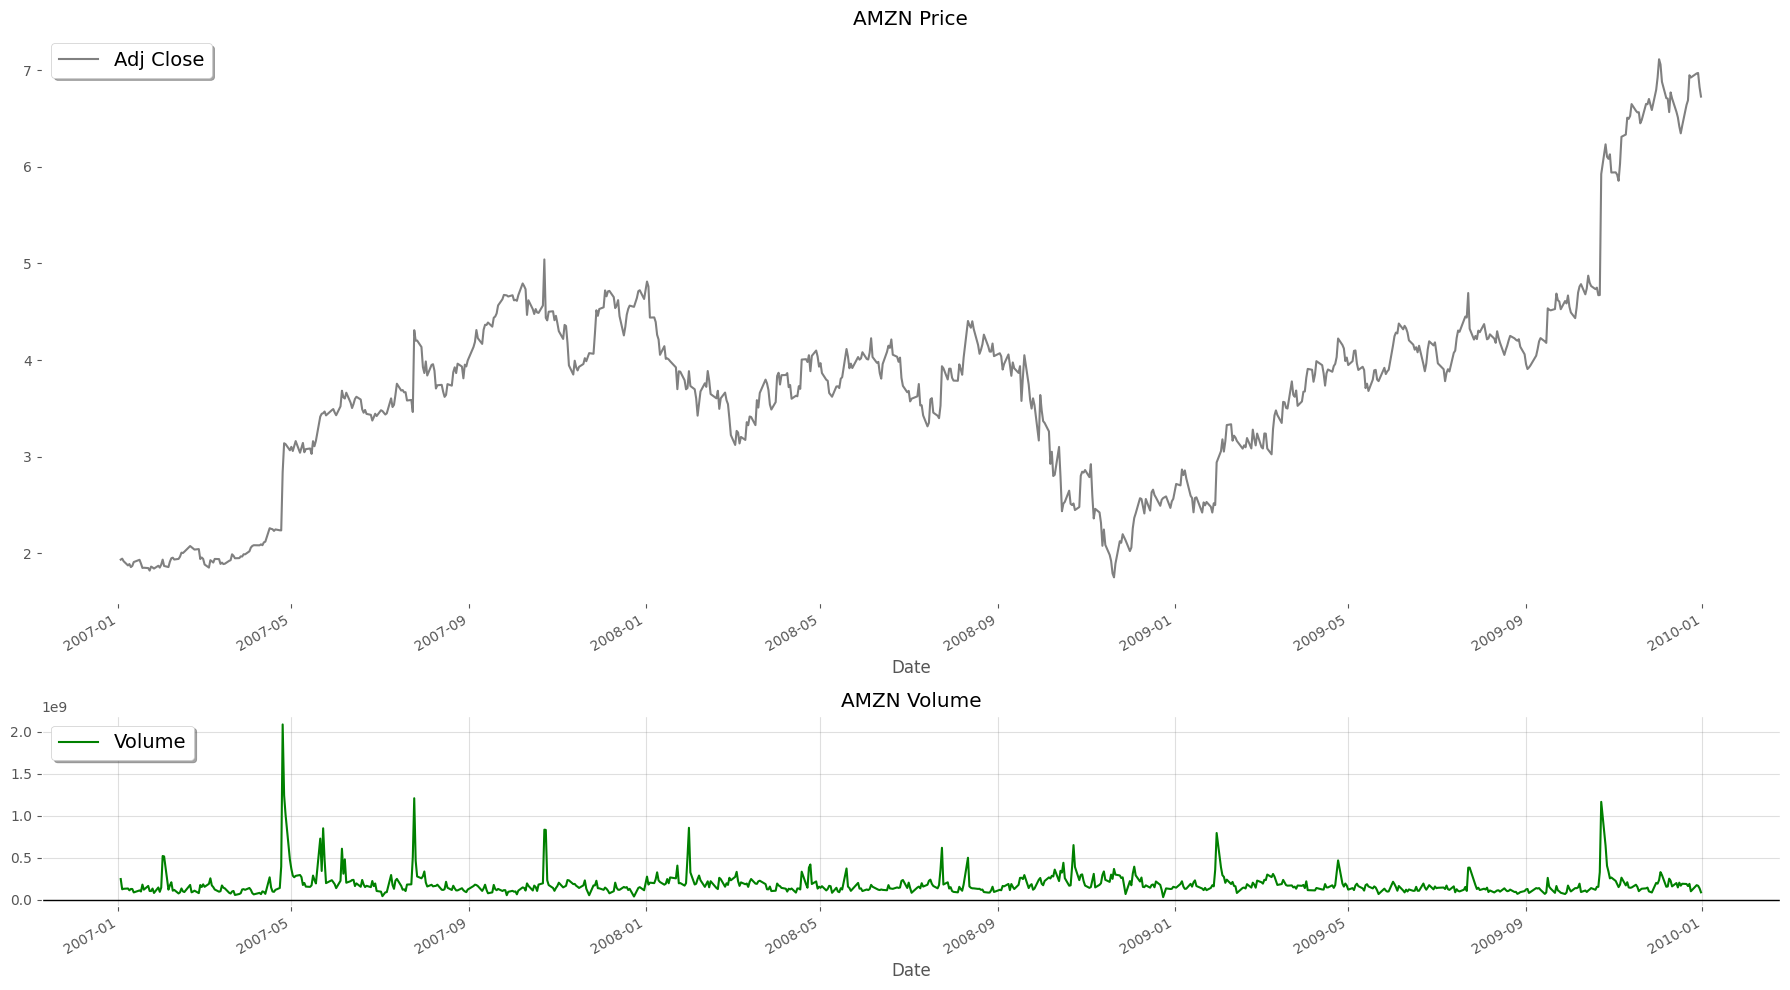

In [96]:
# Create a figure with two subplots (vertically arranged)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 10), 
                               gridspec_kw={'height_ratios': [3, 1]})

# Plot the price and position on the first axis
q7_info[["Adj Close"]].plot(
    secondary_y="AMZN_Price",
    style=["grey", "blue"],
    ax=ax1
)
ax1.set_title('AMZN Price')
ax1.legend(loc="upper left", shadow=True, fancybox=True)

# Plot the Volume on the second axis
q7_info[["Volume"]].plot(
    style=["green", "red"],
    ax=ax2
)
ax2.set_title('AMZN Volume')
ax2.axhline(0, color='black', linewidth=1)  
ax2.legend(loc="upper left", shadow=True, fancybox=True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [97]:
# Create a figure with two subplots arranged vertically
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    row_heights=[0.7, 0.3],  # Adjust the height ratio
                    subplot_titles=("AMZN Price", "AMZN Volume"))

# Plot price on the first subplot
fig.add_trace(go.Scatter(
    x=q7_info.index,
    y=q7_info["Adj Close"],
    mode="lines",
    name="AMZN Price",
    line=dict(color="blue")
), row=1, col=1)

# Plot volume on the second subplot as a bar chart
fig.add_trace(go.Scatter(
    x=q7_info.index,
    y=q7_info["Volume"],
    name="Volume",
    marker=dict(color="green")
), row=2, col=1)

# Add layout details
fig.update_layout(
    height=600, width=900,
    title_text="AMZN Price and Volume",
    showlegend=True
)

# Customize the titles for each subplot
fig.update_yaxes(title_text="AMZN Price", row=1, col=1)
fig.update_yaxes(title_text="Volume", row=2, col=1)
fig.update_xaxes(title_text="Date", row=2, col=1)  # x-axis only on the bottom chart

# Show the plot
fig.show()

## 👇 <font color = "purple"> Bigger Question 8. 

### Please create a predictive model for the weekly return of NFLX stock. You will use supervised learning for your predictive modelling.

> As you learned in class, to do this it is essential to know what factors are related to Netflix’s stock price, and to incorporate as much information as you can into the model.

> Among the three major factors (correlated assets, technical indicators, and fundamental analysis), you will use correlated assets and technical indicators as features here.

    Step 1. Use 75% of your data for the training of your algorithm, and 25% for the testing set.

    Step 2. For your feature engineering...
    
> Our operational definition of `outcome` (`Y`) is the weekly return of Netflix (NFLX). The number of trading days in a week is assumed to be five, and we compute the return using five trading days. 
<br>
    
* <font color = "green"> NOTE: The lagged five-day variables embed the time series component by using a time-delay approach, where the lagged variable is included as one of the predictor variables. This step translates the time series data into a supervised regression-based model framework.
<br>    
    
> For `input features` (`predictors`; `Xs`), we use (The variables used as predictors are as follows) ...

> `Correlated assets`

* lagged five-day returns of stocks (META, APPLE, AMZN, GOOGL);
* currency exchange rates (USD/JPY and GBP/USD);
* indices (S&P 500, Dow Jones, and VIX);
* lagged five-day, 15-day, 30-day, and 60-day returns of NFLX.

> `Technical indicators`

* 21-day, 63-day, and 252-day moving averages;
* 10-day, 30-day, and 200-day exponential moving averages;
* 10-day, 30-day, and 200-day relative strength index;
* stochastic oscillator %K and %D (using rolling windows of 10-, 30-, 200-day);
* rate of change (using 10-, 30-day past prices).
    
    
    Step 3. For your algorithm of choices, please assess the model performance of the following algorithms: 

    
* Linear Regression
* Elastic Net
* LASSO
* Support Vector Machine
* K-Nearest Neighbor
* ARIMA
* Decision Tree
* Extra Trees 
* Random Forest
* Gradient Boosting Tree
* Adaptive Boosting
    
    
    Step 4. For this exercise, hyperparameter tuning is not requested. 
    
    Step 5. But make sure to compare the model performance of the above algorithms.

> The metric for assessing model performance will be mean squared error (`MSE`).
<br>

> Show which of the algorithms perform relatively better by a comparison visualization of performance, for both the training and testing sets learned in class. 

    Step 6. Using the model of your choice, please visualize the actual vs. predicted (estimated) data.

### Below are the lines of code that lead to an answer:

# Refer to Problem Set 7 Q1, Lesson 6, Lesson 9 First Part

In [98]:
return_period = 5

In [99]:
SMA1 = 21
SMA2 = 63
SMA3 = 252

EWMA1 = 10
EWMA2 = 30
EWMA3 = 200

RSI1 = 10
RSI2 = 30
RSI3 = 200

STO1 = 10
STO2 = 30
STO3 = 200

ROC1 = 10
ROC2 = 30

In [100]:
stock_ticker = ["NFLX", "META", "AAPL", "AMZN", "GOOGL"]

currency_ticker = ["DEXJPUS", "DEXUSUK"]

index_ticker = ["SP500", "DJIA", "VIXCLS"]


stock_data = yf.download(stock_ticker)
currency_data = pdr.get_data_fred(currency_ticker)
index_data = pdr.get_data_fred(index_ticker)

[*********************100%%**********************]  5 of 5 completed


In [101]:
def MA(df, n):
    MA = pd.Series(df
                   .rolling(n, min_periods = n)
                   .mean(), 
                   name="MA_" + str(n)
                  )
    return MA

In [102]:
# Exponential Moving Average

def EMA(df, n):
    EMA = pd.Series(df
                    .ewm(span = n,
                         min_periods = n)
                    .mean(),
                    name = "EMA_" + str(n)
                    )
    return EMA

In [103]:
# Relative Strength Index

def RSI(series, period):
    
    delta = series.diff().dropna()
    
    u = delta * 0
    d = u.copy()
    
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    
    u[u.index[period - 1]] = np.mean( u[:period] ) # 
    
    u = u.drop(u.index[:(period - 1)
                      ]
              )
    
    d[d.index[period - 1]] = np.mean( d[:period] )
    
    d = d.drop(d.index[:(period - 1)
                      ]
              )
    
    rs = u.ewm(com = period - 1, adjust = False).mean() / \
         d.ewm(com = period - 1, adjust = False).mean()
    
    return 100 - 100 / (1 + rs)

In [104]:
# Stochastic oscillator

def STOK(close, low, high, n):
    STOK = ((close - low.rolling(n).min()) / \
            (high.rolling(n).max() - low.rolling(n).min()
            )
           ) * 100
    return STOK

def STOD(close, low, high, n):
    STOK = ((close - low.rolling(n).min()) / \
            (high.rolling(n).max() - low.rolling(n).min()
            )
           ) * 100
    
    STOD = STOK.rolling(3).mean()
    return STOD

In [105]:
# Rate of Change (RoC)

def ROC(df, n):
    M = df.diff(n - 1)
    N = df.shift(n - 1)
    ROC = pd.Series((M / N) * 100, 
                    name = "ROC_" + str(n)    
                    )
    return ROC

### Outcome (Y)

In [106]:
Y =\
    (np
     .log(stock_data.loc[ : , ("Adj Close", "NFLX")]
         )
     .diff(return_period)
     .shift(-return_period)
    )

Y

Date
1980-12-12   NaN
1980-12-15   NaN
1980-12-16   NaN
1980-12-17   NaN
1980-12-18   NaN
              ..
2024-10-29   NaN
2024-10-30   NaN
2024-10-31   NaN
2024-11-01   NaN
2024-11-04   NaN
Name: (Adj Close, NFLX), Length: 11066, dtype: float64

In [107]:
Y.name =\
    (Y
     .name[-1]
     +
     "_pred")

Y

Date
1980-12-12   NaN
1980-12-15   NaN
1980-12-16   NaN
1980-12-17   NaN
1980-12-18   NaN
              ..
2024-10-29   NaN
2024-10-30   NaN
2024-10-31   NaN
2024-11-01   NaN
2024-11-04   NaN
Name: NFLX_pred, Length: 11066, dtype: float64

### Input Features (Xs)

In [108]:
X1 =\
    (np.
     log(stock_data.loc[ : , ("Adj Close", ("META", "AAPL", "AMZN", "GOOGL")
                             )
                       ]
        )
     .diff(return_period)
    )

X1.columns =\
    (X1
     .columns
     .droplevel()
    )

X1

Ticker,META,AAPL,AMZN,GOOGL
Date,,,,
1980-12-12,NaN,NaN,NaN,NaN
1980-12-15,NaN,NaN,NaN,NaN
1980-12-16,NaN,NaN,NaN,NaN
1980-12-17,NaN,NaN,NaN,NaN
1980-12-18,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-10-29,0.019179,-0.009329,0.005939,0.027121
2024-10-30,0.048664,-0.002864,0.042503,0.069296
2024-10-31,-0.000352,-0.020418,0.000107,0.050276


In [109]:
X2 =\
    (np
     .log(currency_data)
     .diff(return_period)
    )

X2

,DEXJPUS,DEXUSUK
DATE,,
2019-11-06,NaN,NaN
2019-11-07,NaN,NaN
2019-11-08,NaN,NaN
2019-11-11,NaN,NaN
2019-11-12,NaN,NaN
...,...,...
2024-10-21,NaN,NaN
2024-10-22,0.012586,-0.008752
2024-10-23,0.020495,-0.004317


In [110]:
X3 =\
    (np
     .log(index_data)
     .diff(return_period)
    )

X3

,SP500,DJIA,VIXCLS
DATE,,,
2019-11-06,NaN,NaN,NaN
2019-11-07,NaN,NaN,NaN
2019-11-08,NaN,NaN,NaN
2019-11-11,NaN,NaN,NaN
2019-11-12,NaN,NaN,NaN
...,...,...,...
2024-10-28,-0.005217,-0.012753,0.074963
2024-10-29,-0.003129,-0.016249,0.060754
2024-10-30,0.002799,-0.008822,0.056089


In [111]:
X4 =\
    (
    pd
    .concat([np
             .log(stock_data.loc[ : , ("Adj Close", "NFLX")
                                ]
                 )
             .diff(i) for i in [return_period, 
                                return_period * 3, 
                                return_period * 6, 
                                return_period * 12]
            ],
           axis = 1
           )
    .dropna()
)

X4.columns = ["NFLX_DT", "NFLX_3DT", "NFLX_6DT", "NFLX_12DT"]

X4

,NFLX_DT,NFLX_3DT,NFLX_6DT,NFLX_12DT
Date,,,,
2002-08-19,0.260185,0.113881,-0.179894,-0.197360
2002-08-20,0.202602,0.034553,-0.204095,-0.245680
2002-08-21,0.150103,0.015608,-0.183427,-0.177888
2002-08-22,0.108027,0.098364,-0.255020,-0.115117
2002-08-23,0.084726,0.244763,-0.195297,-0.075443
...,...,...,...,...
2024-10-29,-0.006301,0.050889,0.071678,0.238071
2024-10-30,0.005921,0.035530,0.087675,0.212294
2024-10-31,0.001960,0.034639,0.070848,0.212199


In [112]:
X5 = (
    pd.concat(
        [
            MA(stock_data.loc[:, ("Adj Close", "NFLX")], n)
            for n in [SMA1, SMA2, SMA3]
        ],axis=1
    )
)

X5.columns = ["NFLX_SMA1", "NFLX_SMA2", "NFLX_SMA3"]

X5

,NFLX_SMA1,NFLX_SMA2,NFLX_SMA3
Date,,,
1980-12-12,NaN,NaN,NaN
1980-12-15,NaN,NaN,NaN
1980-12-16,NaN,NaN,NaN
1980-12-17,NaN,NaN,NaN
1980-12-18,NaN,NaN,NaN
...,...,...,...
2024-10-29,729.705712,694.337615,602.135119
2024-10-30,731.972854,696.383489,603.498849
2024-10-31,734.112854,698.643648,604.865278


In [113]:
X6 = (
    pd.concat(
        [
            EMA(stock_data.loc[:, ("Adj Close", "NFLX")], n)
            for n in [EWMA1, EWMA2, EWMA3]
        ],
        axis=1
    )
)

X6.columns = ["NFLX_EWMA1", "NFLX_EWMA2", "NFLX_EWMA3"]

X6

,NFLX_EWMA1,NFLX_EWMA2,NFLX_EWMA3
Date,,,
1980-12-12,NaN,NaN,NaN
1980-12-15,NaN,NaN,NaN
1980-12-16,NaN,NaN,NaN
1980-12-17,NaN,NaN,NaN
1980-12-18,NaN,NaN,NaN
...,...,...,...
2024-10-29,746.900405,725.498357,631.757790
2024-10-30,748.143966,727.320398,632.971544
2024-10-31,749.577796,729.172632,634.196006


In [114]:
X7 = (
    pd.concat(
        [
            RSI(stock_data.loc[:, ("Adj Close", "NFLX")], n)
            for n in [RSI1, RSI2, RSI3]
        ],
        axis=1
    )
)

X7.columns = ["NFLX_RSI1", "NFLX_RSI2", "NFLX_RSI3"]

X7

,NFLX_RSI1,NFLX_RSI2,NFLX_RSI3
Date,,,
2002-06-07,38.808881,NaN,NaN
2002-06-10,45.410152,NaN,NaN
2002-06-11,45.002914,NaN,NaN
2002-06-12,37.141026,NaN,NaN
2002-06-13,35.990382,NaN,NaN
...,...,...,...
2024-10-29,61.736789,59.546224,56.506599
2024-10-30,58.411216,58.376932,56.300365
2024-10-31,59.387787,58.713880,56.364670


In [115]:
X8 = (
    pd.concat(
        [
            STOK(stock_data.loc[:, ("Adj Close", "NFLX")],
                 stock_data.loc[:, ("Low", "NFLX")],
                 stock_data.loc[:, ("High", "NFLX")],
                 n)
            for n in [STO1, STO2, STO3]
        ],
        axis=1
    )
)

X8.columns = ["NFLX_STOK1", "NFLX_STOK2", "NFLX_STOK3"]

X8

,NFLX_STOK1,NFLX_STOK2,NFLX_STOK3
Date,,,
1980-12-12,NaN,NaN,NaN
1980-12-15,NaN,NaN,NaN
1980-12-16,NaN,NaN,NaN
1980-12-17,NaN,NaN,NaN
1980-12-18,NaN,NaN,NaN
...,...,...,...
2024-10-29,85.744325,85.744325,95.445692
2024-10-30,79.751881,79.751881,93.531265
2024-10-31,53.848350,82.159408,94.285051


In [116]:
X9 = (
    pd.concat(
        [
            STOD(stock_data.loc[:, ("Adj Close", "NFLX")],
                 stock_data.loc[:, ("Low", "NFLX")],
                 stock_data.loc[:, ("High", "NFLX")],
                 n)
            for n in [STO1, STO2, STO3]
        ],
        axis=1
    )
)

X9.columns = ["NFLX_STOD1", "NFLX_STOD2", "NFLX_STOD3"]

X9

,NFLX_STOD1,NFLX_STOD2,NFLX_STOD3
Date,,,
1980-12-12,NaN,NaN,NaN
1980-12-15,NaN,NaN,NaN
1980-12-16,NaN,NaN,NaN
1980-12-17,NaN,NaN,NaN
1980-12-18,NaN,NaN,NaN
...,...,...,...
2024-10-29,80.459766,80.459766,93.757416
2024-10-30,80.130356,80.130356,93.652178
2024-10-31,73.114852,82.551871,94.420669


In [117]:
X10 = (
    pd.concat(
        [
            ROC(stock_data.loc[:, ("Adj Close", "NFLX")], n)
            for n in [ROC1, ROC2]
        ],
        axis=1
    )
)

X10.columns = ["NFLX_ROC1", "NFLX_ROC2"]

X10

,NFLX_ROC1,NFLX_ROC2
Date,,
1980-12-12,NaN,NaN
1980-12-15,NaN,NaN
1980-12-16,NaN,NaN
1980-12-17,NaN,NaN
1980-12-18,NaN,NaN
...,...,...
2024-10-29,8.182337,9.988853
2024-10-30,9.610989,7.016694
2024-10-31,-1.028942,7.845598


In [118]:
X=\
(
    pd
    .concat([X1, X2, X3, X4, X5, X6, X7, X8, X9, X10],
            axis = 1)
)

X

,META,AAPL,AMZN,GOOGL,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,NFLX_DT,...,NFLX_RSI2,NFLX_RSI3,NFLX_STOK1,NFLX_STOK2,NFLX_STOK3,NFLX_STOD1,NFLX_STOD2,NFLX_STOD3,NFLX_ROC1,NFLX_ROC2
1980-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-29,0.019179,-0.009329,0.005939,0.027121,NaN,NaN,-0.003129,-0.016249,0.060754,-0.006301,...,59.546224,56.506599,85.744325,85.744325,95.445692,80.459766,80.459766,93.757416,8.182337,9.988853
2024-10-30,0.048664,-0.002864,0.042503,0.069296,NaN,NaN,0.002799,-0.008822,0.056089,0.005921,...,58.376932,56.300365,79.751881,79.751881,93.531265,80.130356,80.130356,93.652178,9.610989,7.016694
2024-10-31,-0.000352,-0.020418,0.000107,0.050276,NaN,NaN,-0.018135,-0.014522,0.193786,0.001960,...,58.713880,56.364670,53.848350,82.159408,94.285051,73.114852,82.551871,94.420669,-1.028942,7.845598
2024-11-01,-0.010681,-0.037423,0.052376,0.035777,NaN,NaN,-0.013751,-0.001478,0.073475,0.001880,...,58.724438,56.366641,41.196833,82.232942,94.308606,58.265688,81.381410,94.041641,-2.068469,7.191967


# Combining X and Y

In [119]:
data =\
(
pd
.concat([Y, X],
        axis = 1)
.dropna()
.iloc[ : :return_period, :]
)

In [120]:
data

,NFLX_pred,META,AAPL,AMZN,GOOGL,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,...,NFLX_RSI2,NFLX_RSI3,NFLX_STOK1,NFLX_STOK2,NFLX_STOK3,NFLX_STOD1,NFLX_STOD2,NFLX_STOD3,NFLX_ROC1,NFLX_ROC2
2019-11-13,0.075001,0.008525,0.030716,-0.024042,0.003997,-0.000276,-0.002489,0.005594,0.010530,0.029667,...,47.521336,48.914857,11.554089,50.444493,23.057354,50.480385,63.310126,28.035799,-1.496127,5.578964
2019-11-21,0.009484,0.024446,-0.002402,-0.011401,-0.006906,0.001845,0.002791,0.002229,-0.000564,0.006112,...,57.490433,50.252683,96.830427,97.867350,44.431985,90.972369,91.911900,40.537987,6.900571,10.165062
2019-11-29,-0.023506,0.018570,0.019802,0.037391,0.003033,0.007335,0.008538,0.009819,0.006286,0.022437,...,57.784451,50.387206,92.615372,95.766361,46.653211,92.875330,95.370877,46.428839,6.653562,14.297137
2019-12-09,0.005637,0.008179,0.010394,-0.018176,0.041140,-0.004594,0.016940,0.007069,0.004545,0.061768,...,52.226554,49.812112,20.488620,63.719263,37.558899,30.131390,71.447851,38.857728,-4.135632,7.322790
2019-12-16,0.090725,-0.017132,0.047340,0.011197,0.013101,0.009623,0.013063,0.017540,0.011623,-0.267294,...,52.823871,49.902454,62.609151,64.658020,38.837780,39.224714,53.933073,35.975870,-0.636926,3.875574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-24,-0.022586,0.049135,0.047650,0.037185,0.018470,0.014009,0.015976,0.017304,0.014366,-0.134749,...,60.656851,56.329585,99.707994,99.792969,99.934338,84.761136,90.796846,96.900781,5.985596,11.456435
2024-10-01,0.021893,0.023058,-0.005115,-0.046594,0.028549,-0.000765,-0.007052,-0.004227,-0.001215,0.224312,...,56.572093,55.705118,48.658079,70.322683,92.737281,52.558583,72.577303,93.311698,2.268025,1.086556
2024-10-08,-0.022106,0.028086,-0.001947,-0.013103,-0.015753,0.031248,-0.014332,0.007396,-0.001819,0.106295,...,58.088362,55.997978,87.859875,94.570278,98.671223,62.018365,83.245417,95.899770,0.027719,3.742891
2024-10-16,0.065193,-0.023508,0.009711,0.009246,0.020183,0.003412,-0.006135,0.008669,0.013219,-0.063325,...,52.886370,55.190510,14.076336,54.787241,87.597579,26.695305,61.427303,89.419030,-0.679115,2.688629


In [121]:
Y = data.loc[ : , Y.name]

Y

2019-11-13    0.075001
2019-11-21    0.009484
2019-11-29   -0.023506
2019-12-09    0.005637
2019-12-16    0.090725
                ...   
2024-09-24   -0.022586
2024-10-01    0.021893
2024-10-08   -0.022106
2024-10-16    0.065193
2024-10-24    0.001960
Name: NFLX_pred, Length: 236, dtype: float64

In [122]:
X = data.loc[ : , X.columns]

X

,META,AAPL,AMZN,GOOGL,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,NFLX_DT,...,NFLX_RSI2,NFLX_RSI3,NFLX_STOK1,NFLX_STOK2,NFLX_STOK3,NFLX_STOD1,NFLX_STOD2,NFLX_STOD3,NFLX_ROC1,NFLX_ROC2
2019-11-13,0.008525,0.030716,-0.024042,0.003997,-0.000276,-0.002489,0.005594,0.010530,0.029667,-0.019172,...,47.521336,48.914857,11.554089,50.444493,23.057354,50.480385,63.310126,28.035799,-1.496127,5.578964
2019-11-21,0.024446,-0.002402,-0.011401,-0.006906,0.001845,0.002791,0.002229,-0.000564,0.006112,0.073439,...,57.490433,50.252683,96.830427,97.867350,44.431985,90.972369,91.911900,40.537987,6.900571,10.165062
2019-11-29,0.018570,0.019802,0.037391,0.003033,0.007335,0.008538,0.009819,0.006286,0.022437,0.009484,...,57.784451,50.387206,92.615372,95.766361,46.653211,92.875330,95.370877,46.428839,6.653562,14.297137
2019-12-09,0.008179,0.010394,-0.018176,0.041140,-0.004594,0.016940,0.007069,0.004545,0.061768,-0.024459,...,52.226554,49.812112,20.488620,63.719263,37.558899,30.131390,71.447851,38.857728,-4.135632,7.322790
2019-12-16,-0.017132,0.047340,0.011197,0.013101,0.009623,0.013063,0.017540,0.011623,-0.267294,0.005637,...,52.823871,49.902454,62.609151,64.658020,38.837780,39.224714,53.933073,35.975870,-0.636926,3.875574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-24,0.049135,0.047650,0.037185,0.018470,0.014009,0.015976,0.017304,0.014366,-0.134749,0.021482,...,60.656851,56.329585,99.707994,99.792969,99.934338,84.761136,90.796846,96.900781,5.985596,11.456435
2024-10-01,0.023058,-0.005115,-0.046594,0.028549,-0.000765,-0.007052,-0.004227,-0.001215,0.224312,-0.022586,...,56.572093,55.705118,48.658079,70.322683,92.737281,52.558583,72.577303,93.311698,2.268025,1.086556
2024-10-08,0.028086,-0.001947,-0.013103,-0.015753,0.031248,-0.014332,0.007396,-0.001819,0.106295,0.021893,...,58.088362,55.997978,87.859875,94.570278,98.671223,62.018365,83.245417,95.899770,0.027719,3.742891
2024-10-16,-0.023508,0.009711,0.009246,0.020183,0.003412,-0.006135,0.008669,0.013219,-0.063325,-0.035584,...,52.886370,55.190510,14.076336,54.787241,87.597579,26.695305,61.427303,89.419030,-0.679115,2.688629


In [123]:
validation_size = 0.25   #75% TRAIN, 25% TEST

In [124]:
train_size =\
    int(len(X) 
        * 
        (1 - validation_size)
       )

X_train, X_test =\
    (X[0         :train_size], 
     X[train_size:len(X)    ]
    )

Y_train, Y_test =\
    (Y[0         :train_size], 
     Y[train_size:len(X)    ]
    )

In [125]:
num_folds = 10
seed = 241001
scoring = "neg_mean_squared_error" 

In [126]:
models = []

In [127]:
models.append(("LR", LinearRegression()
             )
            )

models.append(("EN", ElasticNet()
             )
            )

models.append(("LASSO", Lasso()
             )
            )

models.append(("SVR", SVR()
             )
            )

models.append(("KNN", KNeighborsRegressor()
             )
            )

models.append(("CART", DecisionTreeRegressor()
             )
            )

models.append(("ETR", ExtraTreesRegressor()
              )
             )

models.append(("RFR", RandomForestRegressor()
              )
             )

models.append(("GBR", GradientBoostingRegressor()
              )
             )

models.append(("ABR", AdaBoostRegressor()
              )
             )

In [128]:
### Initialization of Lists:

names = []

kfold_results = []

train_results = []
test_results = []

# Four empty lists are initialized. 
# names will store the names of the models, 
# kfold_results will store the cross-validation results, 
# train_results and test_results 
# will store the performance of the models 
# on the training and testing datasets, respectively.

### Looping through Models:

# Let's iterate over a list of models. 

# Each element in the models list is a tuple 
# containing the name of the model (name) and the model object (model).

for name, model in models:
    
### Appending Model Names:

# The name of the current model is appended to the names list.

    names.append(name)
    
### Let's run K-fold Cross-Validation
    
    kfold =\
        (KFold(n_splits = num_folds,
               random_state = seed,
               shuffle = True)
        )
    
# A KFold object is created with a specified number of splits (num_folds), 
# a random seed (seed), 
# and shuffling enabled.
    
### Running Cross-Validation:
# Let's convert MSE to positive (Here, now it becomes lower the better; See below)

    cv_results =\
        (
         -1
         *
         cross_val_score(model, X_train, Y_train,
                         cv = kfold,   #10-fold cross validation (set)
                         scoring = scoring)
        )
        
# Cross-validation is performed on the training data (X_train, Y_train) using the current model. 
# The negative mean squared error is used 
# as the scoring metric 
# (hence multiplied by -1 to make it positive, 
# as the convention is that higher scores are better).

# Storing Cross-Validation Results:
 
### The cross-validation results for the current model are appended to the kfold_results list.    
    
    kfold_results.append(cv_results)

# Fitting the Model on the Entire Training Set:
  
    res = model.fit(X_train, Y_train) # The model is trained on the entire training dataset.

### Evaluating Model on Training Set:

# The trained model’s predictions on the training set are evaluated 
# using the mean squared error, and the result is appended to train_results.

    train_result = mean_squared_error(res.predict(X_train), Y_train)
    
    train_results.append(train_result)

## Evaluating Model on Testing Set:    
    
# Similarly, the model’s performance is evaluated 
# on the testing set and appended to test_results.
    
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    
    test_results.append(test_result)
    
# Printing the Results:

# The name of the model, 
# the average cross-validation score, 
# the standard deviation of the cross-validation scores, 
# the training set performance, 
# and the testing set performance are printed out.

    message = "%s: %f (%f) %f %f" % (name, cv_results.mean(), #10-fold cross-valiation, so need mean and std of the 10 folds
                                     cv_results.std(), 
                                     train_result, 
                                     test_result)
    print(message)

LR: 0.007058 (0.004961) 0.004202 0.004108
EN: 0.005990 (0.005520) 0.005823 0.001868
LASSO: 0.006019 (0.005552) 0.005917 0.001744
SVR: 0.006292 (0.005479) 0.005723 0.002373
KNN: 0.007077 (0.005221) 0.005160 0.002381
CART: 0.012536 (0.008544) 0.000000 0.018643
ETR: 0.007081 (0.005824) 0.000000 0.002600
RFR: 0.007293 (0.005917) 0.000929 0.007416
GBR: 0.008166 (0.007054) 0.000259 0.011010
ABR: 0.007251 (0.006690) 0.002169 0.002184


#### Comparing the algorithms by examining the cross validation results

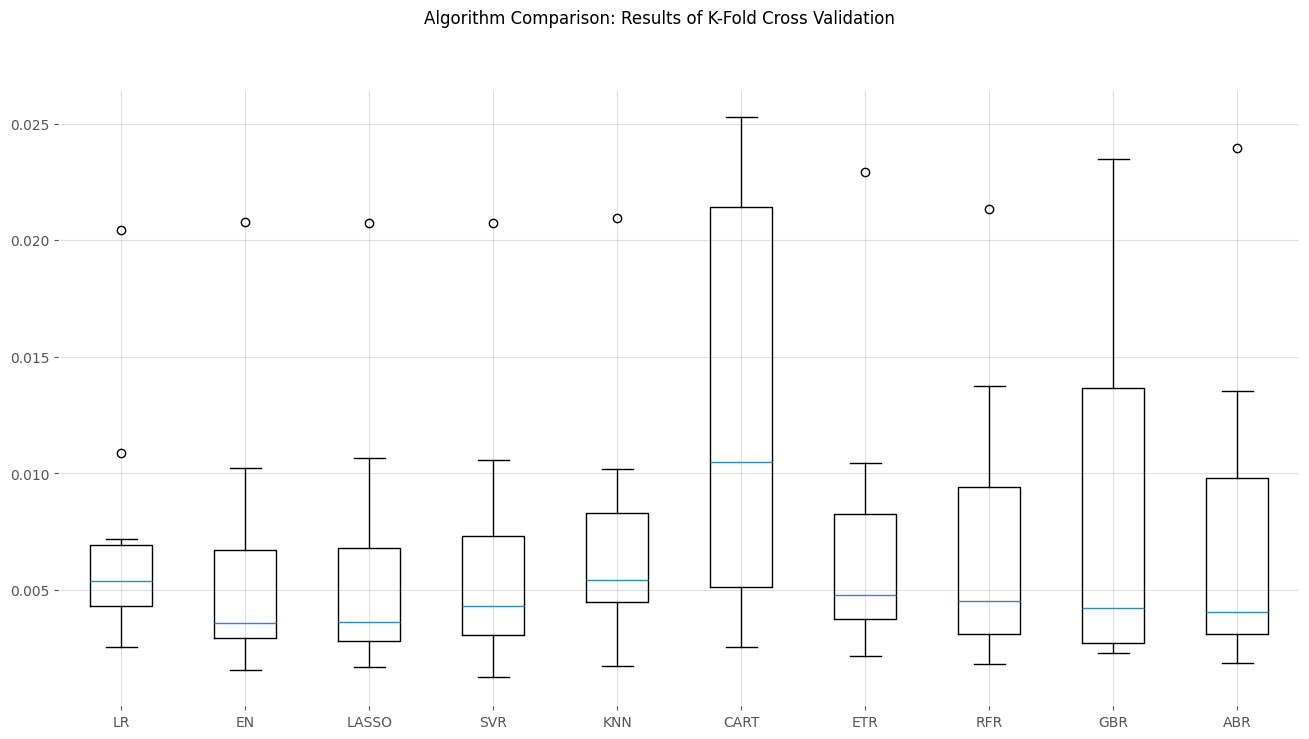

In [129]:
fig = plt.figure(figsize = [16, 8]
                )

fig.suptitle("Algorithm Comparison: Results of K-Fold Cross Validation")

ax = fig.add_subplot(111)

plt.boxplot(kfold_results)

ax.set_xticklabels(names)

plt.show()

#### ARIMA

In [130]:
# Basic Set-up for ARIMA

X_train_ARIMA =\
    (X_train
    .loc[ : , :]
   )

X_test_ARIMA =\
    (X_test
    .loc[ : , :]
)    

train_len = len(X_train_ARIMA)
test_len = len(X_test_ARIMA)
total_len = len(X)

In [131]:
modelARIMA =\
(    stats
     .ARIMA(endog = Y_train,
                exog = X_train_ARIMA,
                order = [1, 0, 0]   # Hyperparameters to be tuned
            )
)

model_fit = modelARIMA.fit()

In [132]:
error_training_ARIMA =\
(    mean_squared_error(Y_train,
                       model_fit.fittedvalues)
)

predicted =\
(
    model_fit
    .predict(start = train_len - 1,
             end = total_len - 1,
             exog = X_test_ARIMA)[1: ]
)

In [133]:
error_testing_ARIMA =\
(    mean_squared_error(Y_test,
                        predicted)
)

error_testing_ARIMA

np.float64(0.004109595514206107)

In [134]:
test_results.append(error_testing_ARIMA)

train_results.append(error_training_ARIMA)

names.append("ARIMA")

### Comparison of Algorithms

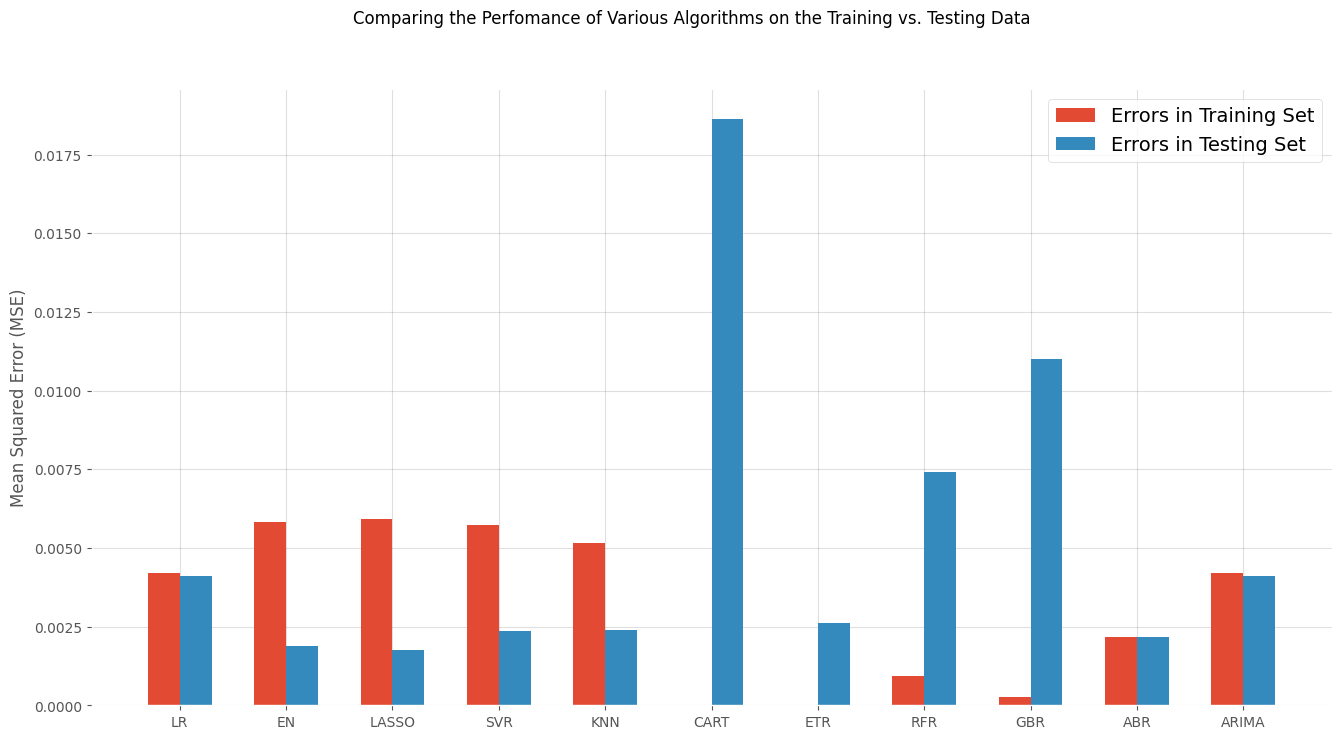

In [135]:
fig = plt.figure(figsize = [16, 8])

ind = np.arange(len(names)
               )

width = 0.30

fig.suptitle("Comparing the Perfomance of Various Algorithms on the Training vs. Testing Data")

ax = fig.add_subplot(111)

(plt
 .bar(ind - width/2,
    
      # Team, this line calculates the starting x position of the bars 
      # representing "Errors in Training Set". 
      # The width/2 term is used to shift the bars to the left, 
      # so they are centered around the tick mark for each group (algorithm) on the x-axis.
      
      # The bar chart will have two sets of bars for each algorithm: 
      # one for training errors and one for testing errors. 
      
      # By subtracting width/2 from ind, 
      # the training error bars are positioned to the left of the center of the tick marks. 
      
      train_results,
      width = width,
      label = "Errors in Training Set")
)

(plt
 .bar(ind + width/2,
      test_results,
      width = width,
      label = "Errors in Testing Set")
)

plt.legend()

ax.set_xticks(ind)
ax.set_xticklabels(names)

plt.ylabel("Mean Squared Error (MSE)")

plt.show()

# Get predicted results from chosen model

In [136]:
model=Lasso()

In [137]:
# Fitting the Model on the Entire Training Set:
  
res = model.fit(X_train, Y_train) # The model is trained on the entire training dataset.

### Evaluating Model on Training Set:

# The trained model’s predictions on the training set are evaluated 
# using the mean squared error, and the result is appended to train_results.

train_result = res.predict(X_train)


## Evaluating Model on Testing Set:    

# Similarly, the model’s performance is evaluated 
# on the testing set and appended to test_results.

test_result = res.predict(X_test)

In [138]:
X_train

,META,AAPL,AMZN,GOOGL,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,NFLX_DT,...,NFLX_RSI2,NFLX_RSI3,NFLX_STOK1,NFLX_STOK2,NFLX_STOK3,NFLX_STOD1,NFLX_STOD2,NFLX_STOD3,NFLX_ROC1,NFLX_ROC2
2019-11-13,0.008525,0.030716,-0.024042,0.003997,-0.000276,-0.002489,0.005594,0.010530,0.029667,-0.019172,...,47.521336,48.914857,11.554089,50.444493,23.057354,50.480385,63.310126,28.035799,-1.496127,5.578964
2019-11-21,0.024446,-0.002402,-0.011401,-0.006906,0.001845,0.002791,0.002229,-0.000564,0.006112,0.073439,...,57.490433,50.252683,96.830427,97.867350,44.431985,90.972369,91.911900,40.537987,6.900571,10.165062
2019-11-29,0.018570,0.019802,0.037391,0.003033,0.007335,0.008538,0.009819,0.006286,0.022437,0.009484,...,57.784451,50.387206,92.615372,95.766361,46.653211,92.875330,95.370877,46.428839,6.653562,14.297137
2019-12-09,0.008179,0.010394,-0.018176,0.041140,-0.004594,0.016940,0.007069,0.004545,0.061768,-0.024459,...,52.226554,49.812112,20.488620,63.719263,37.558899,30.131390,71.447851,38.857728,-4.135632,7.322790
2019-12-16,-0.017132,0.047340,0.011197,0.013101,0.009623,0.013063,0.017540,0.011623,-0.267294,0.005637,...,52.823871,49.902454,62.609151,64.658020,38.837780,39.224714,53.933073,35.975870,-0.636926,3.875574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30,-0.006080,0.038308,0.007933,-0.021815,0.004788,0.000630,0.023198,0.019966,0.011099,0.038107,...,65.706014,53.285887,80.505366,92.021897,96.555798,58.311113,86.357406,93.333895,1.974720,18.637717
2023-07-10,0.024507,-0.028022,-0.025090,-0.027527,-0.020556,0.011123,-0.010391,-0.013869,0.104845,0.002766,...,64.636242,53.290025,76.539120,90.249542,96.129406,71.066626,88.049585,95.226549,6.195602,23.038995
2023-07-18,0.045097,0.029598,0.030965,0.054974,-0.011236,0.011790,0.025733,0.019954,-0.109562,0.075642,...,69.134233,54.354340,92.936946,95.905138,98.742585,70.279020,87.338620,96.694297,6.481273,17.658715
2023-07-25,-0.057986,-0.000568,-0.028250,-0.012603,0.014079,-0.013729,0.002736,0.013813,0.041243,-0.104472,...,54.727846,52.536842,12.931181,22.040833,79.031732,11.284465,26.712903,79.089058,-3.682012,0.879782


In [139]:
Train_result = pd.DataFrame(data=train_result,
                            index=X_train.index, 
                            columns=["Result"])

In [140]:
Test_result = pd.DataFrame(data=test_result, 
                            index=X_test.index, 
                            columns=["Result"])

In [141]:
Overall_results = pd.concat([Train_result, Test_result], 
                            axis=0)
Overall_results

,Result
2019-11-13,0.006412
2019-11-21,0.006416
2019-11-29,0.006381
2019-12-09,0.006356
2019-12-16,0.006353
...,...
2024-09-24,-0.004789
2024-10-01,-0.004898
2024-10-08,-0.004997
2024-10-16,-0.005194


In [142]:
Combined_df = pd.merge(data,Overall_results,left_index=True,right_index=True)

In [143]:
Combined_df

,NFLX_pred,META,AAPL,AMZN,GOOGL,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,...,NFLX_RSI3,NFLX_STOK1,NFLX_STOK2,NFLX_STOK3,NFLX_STOD1,NFLX_STOD2,NFLX_STOD3,NFLX_ROC1,NFLX_ROC2,Result
2019-11-13,0.075001,0.008525,0.030716,-0.024042,0.003997,-0.000276,-0.002489,0.005594,0.010530,0.029667,...,48.914857,11.554089,50.444493,23.057354,50.480385,63.310126,28.035799,-1.496127,5.578964,0.006412
2019-11-21,0.009484,0.024446,-0.002402,-0.011401,-0.006906,0.001845,0.002791,0.002229,-0.000564,0.006112,...,50.252683,96.830427,97.867350,44.431985,90.972369,91.911900,40.537987,6.900571,10.165062,0.006416
2019-11-29,-0.023506,0.018570,0.019802,0.037391,0.003033,0.007335,0.008538,0.009819,0.006286,0.022437,...,50.387206,92.615372,95.766361,46.653211,92.875330,95.370877,46.428839,6.653562,14.297137,0.006381
2019-12-09,0.005637,0.008179,0.010394,-0.018176,0.041140,-0.004594,0.016940,0.007069,0.004545,0.061768,...,49.812112,20.488620,63.719263,37.558899,30.131390,71.447851,38.857728,-4.135632,7.322790,0.006356
2019-12-16,0.090725,-0.017132,0.047340,0.011197,0.013101,0.009623,0.013063,0.017540,0.011623,-0.267294,...,49.902454,62.609151,64.658020,38.837780,39.224714,53.933073,35.975870,-0.636926,3.875574,0.006353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-24,-0.022586,0.049135,0.047650,0.037185,0.018470,0.014009,0.015976,0.017304,0.014366,-0.134749,...,56.329585,99.707994,99.792969,99.934338,84.761136,90.796846,96.900781,5.985596,11.456435,-0.004789
2024-10-01,0.021893,0.023058,-0.005115,-0.046594,0.028549,-0.000765,-0.007052,-0.004227,-0.001215,0.224312,...,55.705118,48.658079,70.322683,92.737281,52.558583,72.577303,93.311698,2.268025,1.086556,-0.004898
2024-10-08,-0.022106,0.028086,-0.001947,-0.013103,-0.015753,0.031248,-0.014332,0.007396,-0.001819,0.106295,...,55.997978,87.859875,94.570278,98.671223,62.018365,83.245417,95.899770,0.027719,3.742891,-0.004997
2024-10-16,0.065193,-0.023508,0.009711,0.009246,0.020183,0.003412,-0.006135,0.008669,0.013219,-0.063325,...,55.190510,14.076336,54.787241,87.597579,26.695305,61.427303,89.419030,-0.679115,2.688629,-0.005194


### <font color = red> Answer 8 is presented in the cell below: </font>

<Axes: >

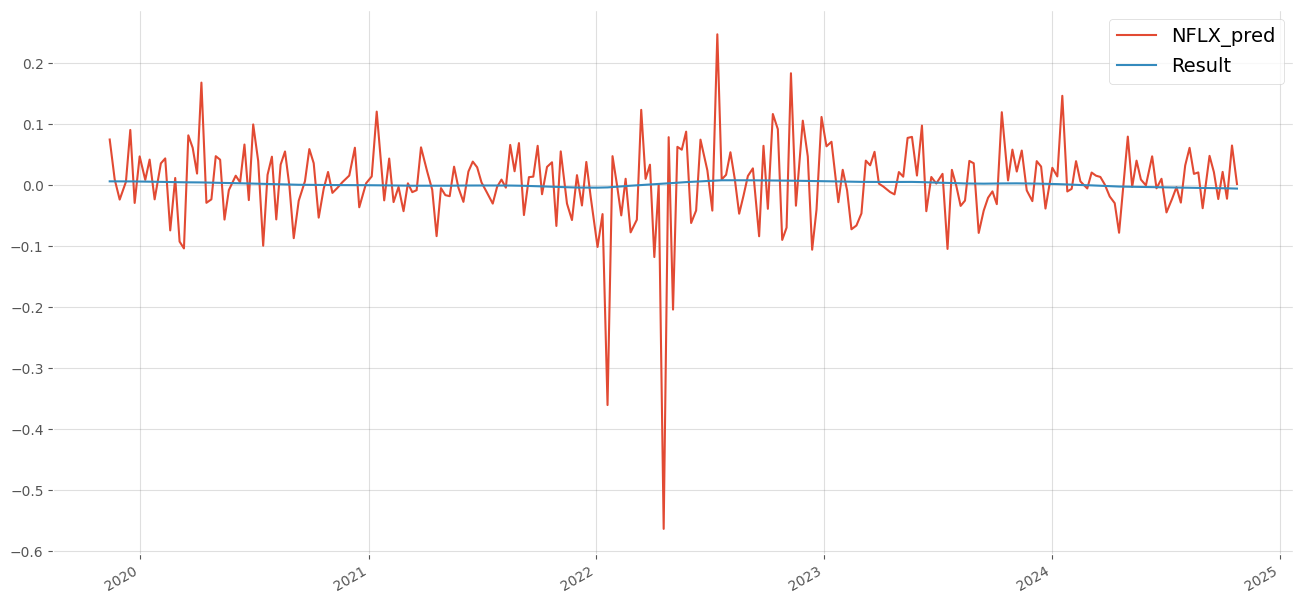

In [144]:
Combined_df \
    [["NFLX_pred", "Result"]] \
    .plot(figsize = (16, 8)
         )

In [145]:
# Create a plotly figure
fig = go.Figure()

# Add NFLX_pred line
fig.add_trace(go.Scatter(
    x=Combined_df.index,
    y=Combined_df["NFLX_pred"],
    mode="lines",
    name="NFLX Prediction",
    line=dict(color="blue")
))

# Add Result line
fig.add_trace(go.Scatter(
    x=Combined_df.index,
    y=Combined_df["Result"],
    mode="lines",
    name="Actual Result",
    line=dict(color="red")
))

# Customize layout
fig.update_layout(
    title="NFLX Prediction vs Actual Result",
    xaxis_title="Date",
    yaxis_title="Value",
    height=600, width=1000,
    legend=dict(x=0.01, y=0.99)  # Position legend at the top left
)

# Show plot
fig.show()

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊